<a href="https://colab.research.google.com/github/gabrieladnz/AED-cardio-tech/blob/main/heart_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANÁLISE EXPLORÁTORIA DE DADOS (EDA) - HEART ATTACK**

**Descrição inicial do conjunto de dados**

In [ ]:
# Descrição inicial do conjunto de dados

  # Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from google.colab import autoviz

dados = pd.read_csv('heart.csv')

num_observacoes, num_variaveis =  dados.shape
tamanho_base = num_observacoes + num_variaveis

print("Apresentação do conjunto de dados\n")

print(f"\nTamanho da base de dados Heart.csv: \n")

print(f"Número de Observações (Linhas): {num_observacoes}")
print(f"Número de Variáveis (Colunas): {num_variaveis}")


print("\n------------------------------------------")

print("\nTipos de dados\n")
print(dados.info())

Apresentação do conjunto de dados


Tamanho da base de dados Heart.csv: 

Número de Observações (Linhas): 303
Número de Variáveis (Colunas): 14

------------------------------------------

Tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [ ]:
nRow, nCol = dados.shape
#os dados que estão armazenados na variável dados, vão ser transformados em tabelas.
#Como os dados estão organizados como tabelas no arquivo, não é necessário um nível alto de tratamento,
# apenas transforma-los em Dataset é o bastante.
dataset = pd.DataFrame(dados)
dataset.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Verificando o número de valores exclusivos em cada coluna

dict = {}
for i in list(dados.columns):
    dict[i] = dados[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).transpose()

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


# **ESTATÍSCA DESCRITIVA**

**SEPARAÇAO DE DADOS**

In [ ]:
from os import XATTR_CREATE

#ESTATÍSTICA DESCRITIVA - Variavéis Numéricas e Categóricas

#Separando os dados CATEGÓRICOS DOS DADOS NUMÉRICOS

#----------------------- DADOS NUMERICOS -----------------------

#fazendo um dataframe com apenas as colunas de dados Numéricos
#retirando as colunas - Sex, exng, caa, cp, fbs, rest_ecg , output, thall, slp:
dfNumerico = dados.drop(["sex","exng","caa","cp","fbs","restecg","thall","slp"], axis =1)
feature_names = ["age","trtbps","chol","thalachh","oldpeak"]

#criando um dataSet:
dataSetNumerico = pd.DataFrame(dfNumerico)

#criando o X e Y:
x_Numerico = dataSetNumerico.iloc[:, 0:5].values
y_Numerico = dataSetNumerico.iloc[:, 4:5].values

#Transformando o X em dataframe, e deste modo permitindo fazer os Cálculos necessários como se os dados fossem tabelas
x_NumericoDF = pd.DataFrame(x_Numerico, columns=feature_names)
#----------------------- DADOS CATEGÓRICOS -----------------------

#fazendo um dataframe com apenas as colunas de dados Categóricos

#retirando as colunas - Age, trtbps, chol, thalachh, oldpeak:
dfCategorico = dados.drop(["age","trtbps","chol","thalachh","oldpeak"],axis=1)
feature_cat = ["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

#criando um dataSet:
dataSetCategorico = pd.DataFrame(dfCategorico)

#criando o X e Y:
x_Categorico = dataSetCategorico.iloc[:, 0:9].values
y_Categorico = dataSetCategorico.iloc[:, 8:9].values

#Transformando o X em dataframe, e deste modo permitindo fazer os Cálculos necessários como se os dados fossem tabelas
x_CategoricoDF = pd.DataFrame(x_Categorico, columns=feature_cat)

**VARIÁVEIS NUMÉRICAS**

In [ ]:
# Médias - Variavéis Numéricas - pegue de todas as colunas ('X') pegue a média de cada uma coluna e mostre
medias = x_NumericoDF.mean()
print("Médias\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(medias)

Médias

Colunas: Age, trtbps, chol, thalachh, oldpeak

age          54.366337
trtbps      131.623762
chol        246.264026
thalachh    149.646865
oldpeak       1.039604
dtype: float64


In [ ]:
# Medianas - Variavéis Numéricas - pegue de todas as colunas ('X') a mediana de cada uma coluna e mostre
medianas = x_NumericoDF.median()
print("Medianas\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(medianas)

Medianas

Colunas: Age, trtbps, chol, thalachh, oldpeak

age          55.0
trtbps      130.0
chol        240.0
thalachh    153.0
oldpeak       0.8
dtype: float64


In [ ]:
# Variâncias - Variavéis Numéricas
variancias = x_NumericoDF.var()
print("Variâncias\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(variancias)

Variâncias

Colunas: Age, trtbps, chol, thalachh, oldpeak

age           82.484558
trtbps       307.586453
chol        2686.426748
thalachh     524.646406
oldpeak        1.348095
dtype: float64


In [ ]:
# Desvio Padrão - Variavéis Numéricas
desvio_padrao = x_NumericoDF.std()
print("Desvio Padrão\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(desvio_padrao)

Desvio Padrão

Colunas: Age, trtbps, chol, thalachh, oldpeak

age          9.082101
trtbps      17.538143
chol        51.830751
thalachh    22.905161
oldpeak      1.161075
dtype: float64


In [ ]:
# Correlações - Variavéis Numéricas

print("Correlações\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(x_NumericoDF.corr())

Correlações

Colunas: Age, trtbps, chol, thalachh, oldpeak

               age    trtbps      chol  thalachh   oldpeak
age       1.000000  0.279351  0.213678 -0.398522  0.210013
trtbps    0.279351  1.000000  0.123174 -0.046698  0.193216
chol      0.213678  0.123174  1.000000 -0.009940  0.053952
thalachh -0.398522 -0.046698 -0.009940  1.000000 -0.344187
oldpeak   0.210013  0.193216  0.053952 -0.344187  1.000000


In [ ]:
# Quartis - Variavéis Numéricas

print("Colunas: Age, trtbps, chol, thalachh, oldpeak")
Q1 = x_NumericoDF.quantile(0.25)
Q2 = x_NumericoDF.quantile(0.5)
Q3 = x_NumericoDF.quantile(0.75)
Q4 = x_NumericoDF.quantile(1.0)
print("\nPrimeiro Quartil\n")
print(Q1)
print("\n---------------------------\n")
print("\nSegundo Quartil\n")
print(Q2)
print("\n---------------------------\n")
print("\nTerceiro Quartil\n")
print(Q3)
print("\n---------------------------\n")

Colunas: Age, trtbps, chol, thalachh, oldpeak

Primeiro Quartil

age          47.5
trtbps      120.0
chol        211.0
thalachh    133.5
oldpeak       0.0
Name: 0.25, dtype: float64

---------------------------


Segundo Quartil

age          55.0
trtbps      130.0
chol        240.0
thalachh    153.0
oldpeak       0.8
Name: 0.5, dtype: float64

---------------------------


Terceiro Quartil

age          61.0
trtbps      140.0
chol        274.5
thalachh    166.0
oldpeak       1.6
Name: 0.75, dtype: float64

---------------------------



In [ ]:
#MINIMO E MÁXIMO - Variavéis Numéricas

print("MÍNIMO\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(minimo)
print("\n---------------------------")
print("\nMÁXIMO\n")
print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")
print(maximo)

MÍNIMO

Colunas: Age, trtbps, chol, thalachh, oldpeak

age          29.0
trtbps       94.0
chol        126.0
thalachh     71.0
oldpeak       0.0
dtype: float64

---------------------------

MÁXIMO

Colunas: Age, trtbps, chol, thalachh, oldpeak

age          77.0
trtbps      200.0
chol        564.0
thalachh    202.0
oldpeak       6.2
dtype: float64


In [ ]:
# Intervalo Interquartil - Variavéis Numéricas

IQR = Q3 - Q1
maximo = x_NumericoDF.max()
minimo = x_NumericoDF.min()

print("Colunas: Age, trtbps, chol, thalachh, oldpeak\n")

# Intervalo

Intervalo = maximo - minimo
print("Intervalos\n")
print(Intervalo)
print("\n---------------------------\n")
print("Intervalos Interquartil (Q3 - Q1)\n")
print(IQR)

Colunas: Age, trtbps, chol, thalachh, oldpeak

Intervalos

age          48.0
trtbps      106.0
chol        438.0
thalachh    131.0
oldpeak       6.2
dtype: float64

---------------------------

Intervalos Interquartil (Q3 - Q1)

age         13.5
trtbps      20.0
chol        63.5
thalachh    32.5
oldpeak      1.6
dtype: float64


**VARIÉVEIS CATEGÓRICAS**

In [ ]:
# Modas - Variavéis Categóricas- pegue de todas as colunas ('X') a moda de cada uma coluna e mostre

modas = x_CategoricoDF.mode()
print("Modas\n")
print("Colunas: Sex, cp, fbs, rest_ecg, exng, slp, caa, thall, output\n")
print(modas)

Modas

Colunas: Sex, cp, fbs, rest_ecg, exng, slp, caa, thall, output

   sex  cp  fbs  restecg  exng  slp  caa  thall  output
0    1   0    0        1     0    2    0      2       1


In [ ]:
# Frequência - Variavéis Categóricas

#SEX - SEXO
print("Sex: 0 = mulher; 1 = Homem\n")
count = x_CategoricoDF['sex'].value_counts()
print(count)
print("\n---------------------------")

#CP - Chest Pain Type (TIPO DE DOR NO PEITO)
#Value 0: Typical AnginaValue 1: Atypical AnginaValue 2: Non-Anginal PainValue 3: Asymptomatic
print("\ncp:  0 = Angina Típica; 1 = angina Atípica; 2 = Não-Anginal; 3 = Assintomática\n")
count = x_CategoricoDF['cp'].value_counts()
print(count)
print("\n---------------------------")

#fbs - Fasting Blood Sugar (Açúcar no sangue em jejum)
print("\nFbs: 0 = <= 120 mg/dL; 1 = 120 mg/dL\n")
count = x_CategoricoDF['fbs'].value_counts()
print(count)
print("\n---------------------------")

#restecg - Resting ECG Results (Eletrocardiograma)
print("\nrestecg: 0 = Normal; 1 = ST-T Wave Abnormality; 2 = Probable or Definite Left Ventricular Hypertrophy\n")
count = x_CategoricoDF['restecg'].value_counts()
print(count)
print("\n---------------------------")

#exng - Exercise-Induced Angina (angina induzida por exercício)
print("\nexng: 0 = No; 1 = Yes\n")
count = x_CategoricoDF['exng'].value_counts()
print(count)
print("\n---------------------------")

#slp - Slope of ST Segment (inclinação do segmento st)
print("\nslp: 0 = Downsloping; 1 = Flat; 2 = Upsloping diagnosis\n")
count = x_CategoricoDF['slp'].value_counts()
print(count)
print("\n---------------------------")

#caa - Number of Major Vessels Colored by Fluoroscopy (Número de vasos principais coloridos por fluoroscopia)
print("\ncaa: Number of Major Vessels Colored by Fluoroscopy 0-3\n")
count = x_CategoricoDF['caa'].value_counts()
print(count)
print("\n---------------------------")

#thall - Thalassemia Type (Talassemia)
print("\nthall: 0 = None; 1 = Fixed Defect; 2 = Reversible Defect; 3 = Thalassemia\n")
count = x_CategoricoDF['thall'].value_counts()
print(count)
print("\n---------------------------")

#output - Risk of Heart Attack (Risco de ataque cardiaco)
print("\noutput: 0 = No; 1 = Yes\n")
count = x_CategoricoDF['output'].value_counts()
print(count)


Sex: 0 = mulher; 1 = Homem

1    207
0     96
Name: sex, dtype: int64

---------------------------

cp:  0 = Angina Típica; 1 = angina Atípica; 2 = Não-Anginal; 3 = Assintomática

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

---------------------------

Fbs: 0 = <= 120 mg/dL; 1 = 120 mg/dL

0    258
1     45
Name: fbs, dtype: int64

---------------------------

restecg: 0 = Normal; 1 = ST-T Wave Abnormality; 2 = Probable or Definite Left Ventricular Hypertrophy

1    152
0    147
2      4
Name: restecg, dtype: int64

---------------------------

exng: 0 = No; 1 = Yes

0    204
1     99
Name: exng, dtype: int64

---------------------------

slp: 0 = Downsloping; 1 = Flat; 2 = Upsloping diagnosis

2    142
1    140
0     21
Name: slp, dtype: int64

---------------------------

caa: Number of Major Vessels Colored by Fluoroscopy 0-3

0    175
1     65
2     38
3     20
4      5
Name: caa, dtype: int64

---------------------------

thall: 0 = None; 1 = Fixed Defect; 2 = Reve

#**PRÉ-PROCESSAMENTO DOS DADOS**

**VARIÁVEIS NUMÉRICAS**

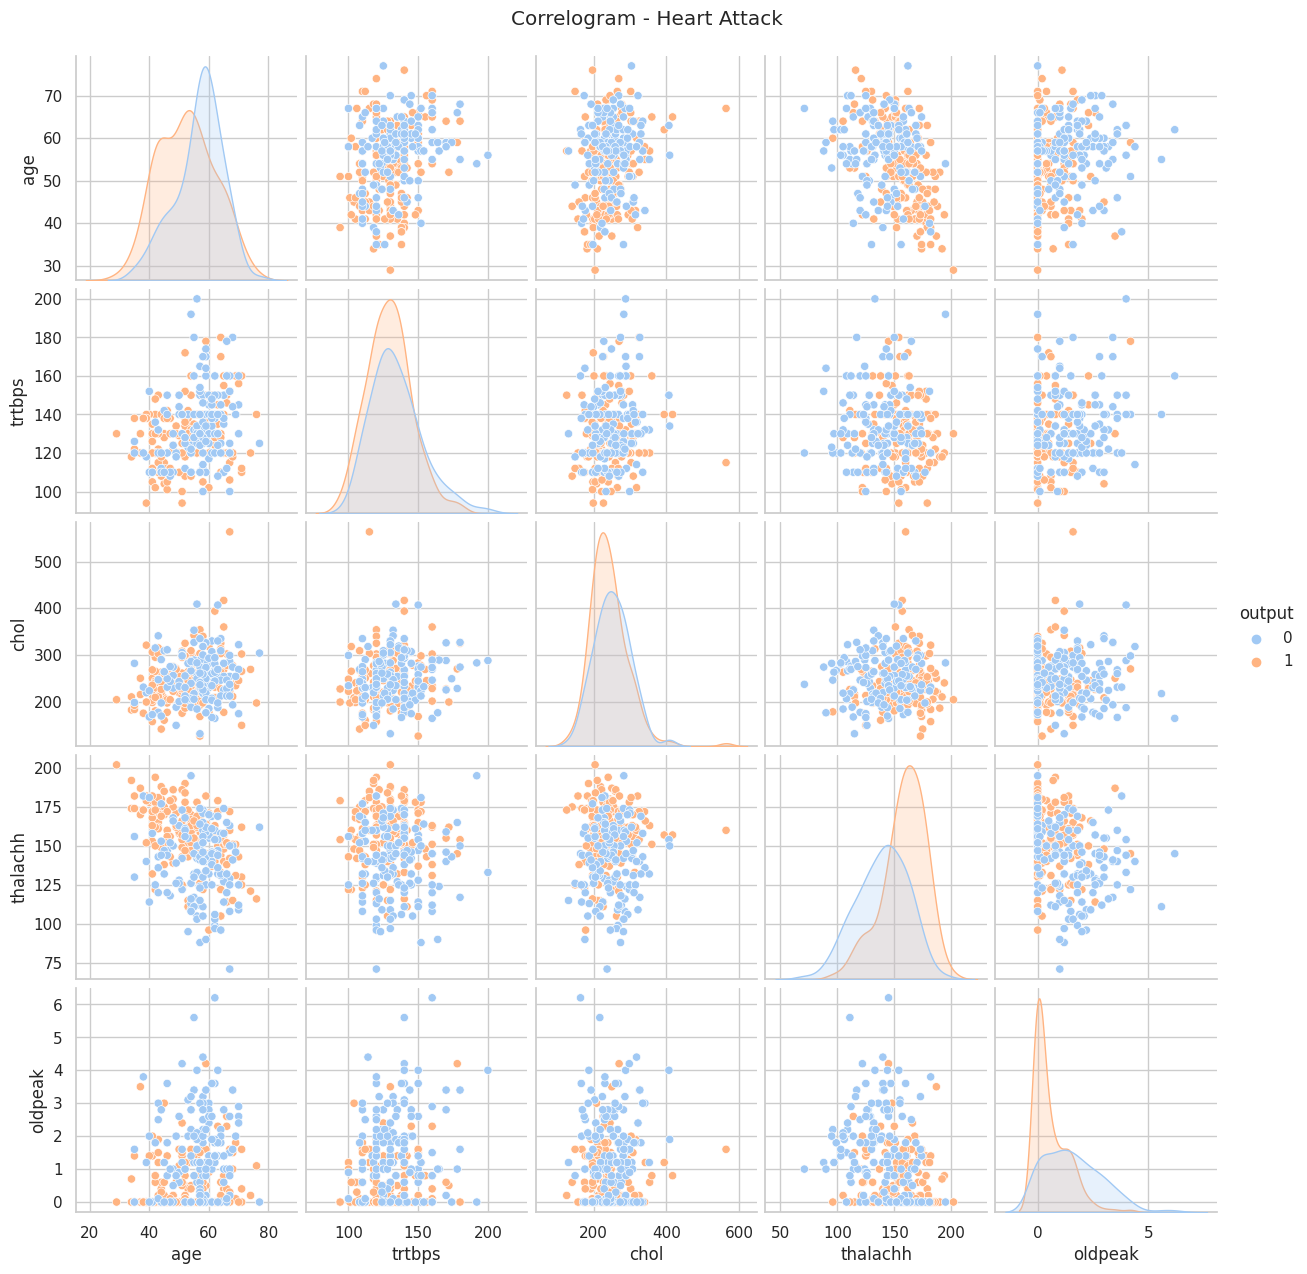

In [ ]:
# Pré-processamento dos dados - Variáveis Numéricas | Gabi

# Gráfico dos dados númericos - Correlogram

dataSetNumerico = pd.DataFrame(dfNumerico)

# Definindo estilos para o gráfico
sns.set(style="whitegrid")
palette = "pastel"
sns.set_palette(palette)

# Crie um correlograma usando Seaborn
sns.pairplot(dataSetNumerico, hue='output')
plt.suptitle('Correlogram - Heart Attack' + '\n', y=1.02)
plt.show()

**VARIÁVEIS CATEGÓRICAS**

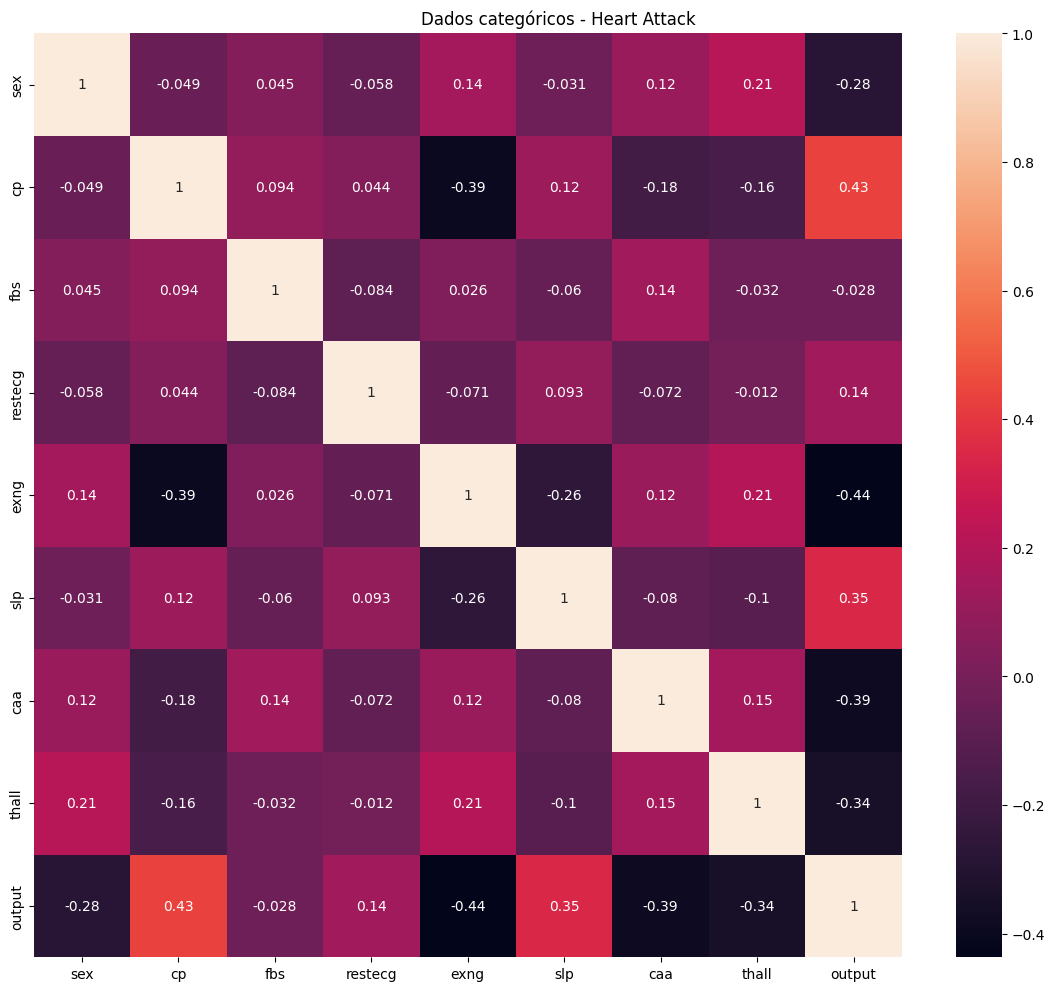

In [ ]:
# Gráfico dos dados categóricos - Heatmap | Gabi

# Base de dados categóricos
dataSetCategorico = pd.DataFrame(dfCategorico)

# Define o tamanho da figura
plt.figure(figsize=(14, 12))

# Cria o heatmap com o tamanho da figura especificado
p1 = sns.heatmap(dataSetCategorico.corr(), annot=True)

# Mostra o gráfico
plt.suptitle('Dados categóricos - Heart Attack', y=0.9)
plt.show()

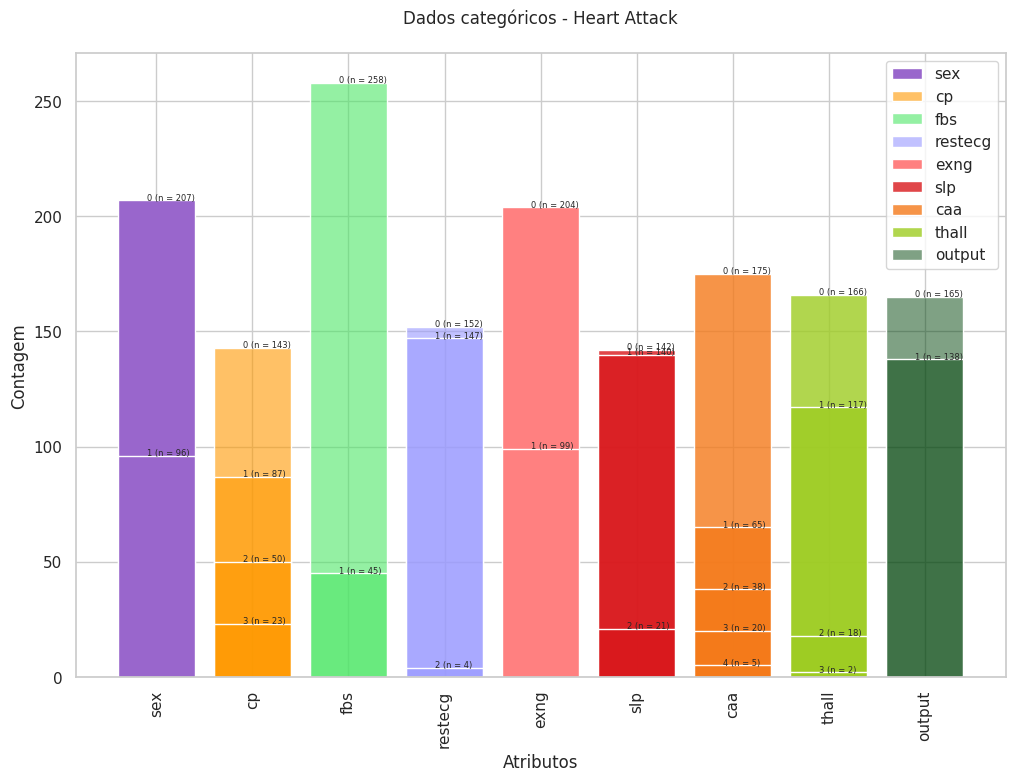

In [ ]:
# Base de dados categóricos - Barplot | Gabi
dataSetCategorico = pd.DataFrame(dfCategorico)

# Lista de atributos que você deseja plotar
atributos = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'output']

# Definindo a largura x altura do gráfico
plt.figure(figsize=(12, 8))

# Largura das barras
barWidth = 0.8

# Posições das barras no eixo X
r = np.arange(len(atributos))

# Cores
cores = [(0.6, 0.4, 0.8, 1.0), (1.0, 0.6, 0.0, 0.6), (0.3, 0.9, 0.4, 0.6), (0.6, 0.6, 1.0, 0.6), (1.0, 0.5, 0.5, 1.0),
       (0.850640, 0.093273, 0.111683, 0.8),  (0.955300, 0.477510, 0.101076, 0.8), (0.619856, 0.799364, 0.134692, 0.8),  (0.0, 0.267004, 0.044809, 0.5)]

# cores = [(0.3, 0.1, 0.4, 0.6), (1.0, 0.6, 0.0, 0.6), (0.3, 0.9, 0.4, 0.6), (0.6, 0.6, 1.0, 0.6), (1.0, 0.5, 0.5, 1.0),
#         (0.8, 0.6, 0.9, 0.6), (1.0, 0.6, 0.6, 0.6), (0.3, 0.5, 0.4, 0.6), (1.0, 0.5, 0.5, 1.0)]

# Crie os gráficos de barras com cores e rótulos
for i, atributo in enumerate(atributos):
    contagem = dataSetCategorico[atributo].value_counts()
    plt.bar(r[i], contagem, width=barWidth, color=cores[i], label=atributo)
    for j, valor in enumerate(contagem):
        plt.text(x=r[i] - 0.1, y=valor + 0.1, s=f'{j} (n = {valor})', size=6)


# Adicione rótulos, título e legenda
plt.xlabel('Atributos')
plt.ylabel('Contagem')
plt.title('Dados categóricos - Heart Attack' + "\n")
plt.xticks(r, atributos, rotation=90)
plt.legend()

# Ajuste as margens
plt.subplots_adjust(bottom=0.2, top=0.98)

# Exiba o gráfico
plt.show()


#**ANÁLISE DE DISTRIBUIÇÃO DE VARIÁVEIS - VARIÁVEIS NUMÉRICAS**





In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas
dfNumerico.describe()

# Fazer uma nova análise dos dados e verificar possíveis assimetrias, outliers e padrões -- (Flávio)

,age,trtbps,chol,thalachh,oldpeak,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.544554
std,9.082101,17.538143,51.830751,22.905161,1.161075,0.498835
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,1.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,1.000000


In [ ]:
# Verificação de valores nulos - Variáveis Numéricas
dfNumerico.isnull().sum()

age         0
trtbps      0
chol        0
thalachh    0
oldpeak     0
output      0
dtype: int64

In [ ]:
# Verificação do balanceamento das variáveis numéricas

dfNumerico.value_counts()



age  trtbps  chol  thalachh  oldpeak  output
38   138     175   173       0.0      1         2
29   130     204   202       0.0      1         1
59   160     273   125       0.0      0         1
     150     212   157       1.6      1         1
     140     221   164       0.0      1         1
                                               ..
51   130     305   142       1.2      0         1
             256   149       0.5      1         1
     125     245   166       2.4      1         1
             213   125       1.4      1         1
77   125     304   162       0.0      0         1
Length: 302, dtype: int64

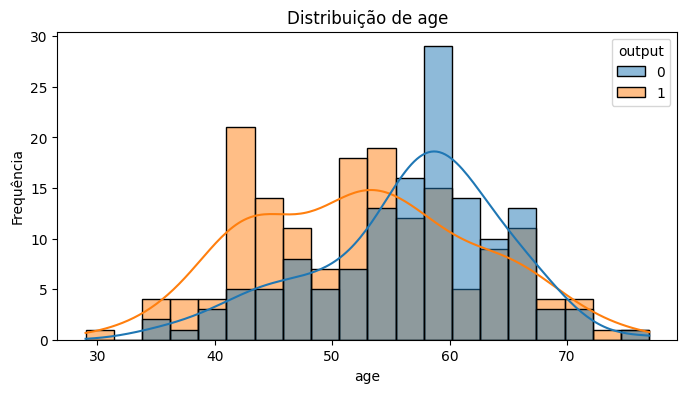

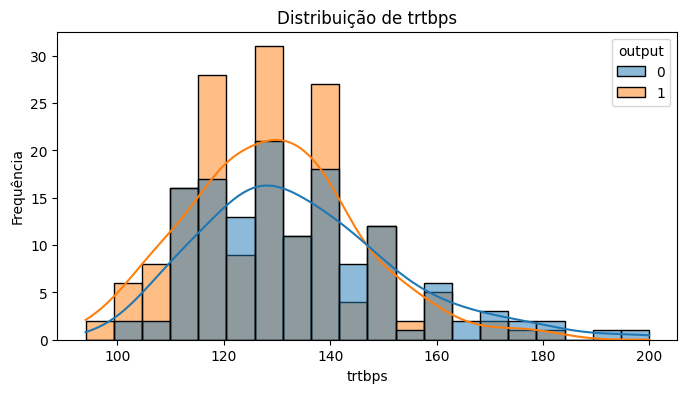

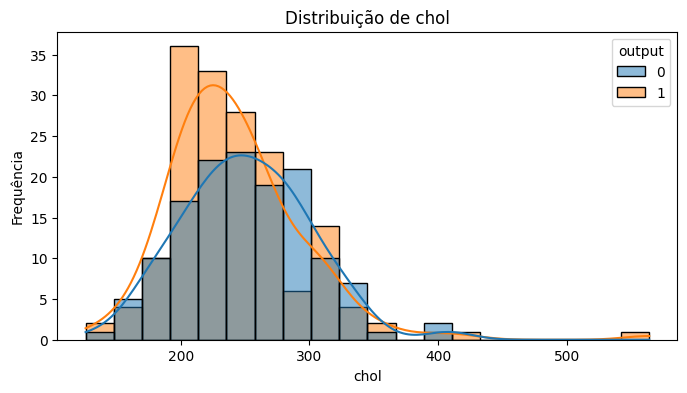

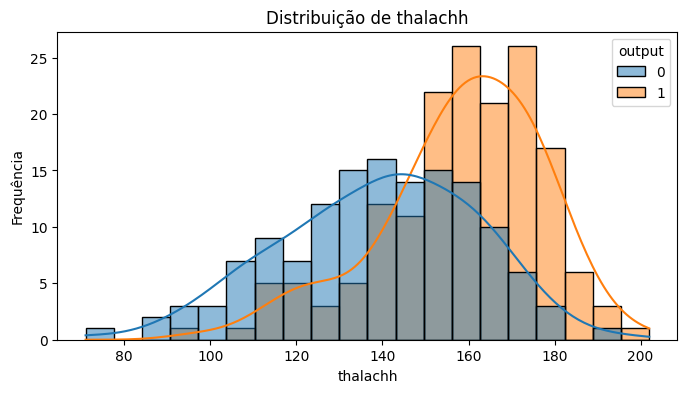

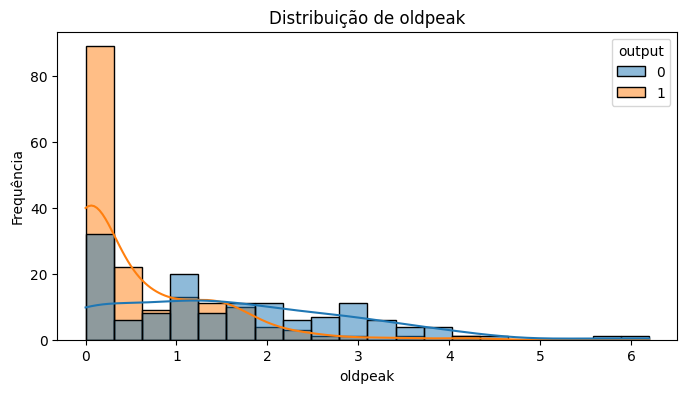

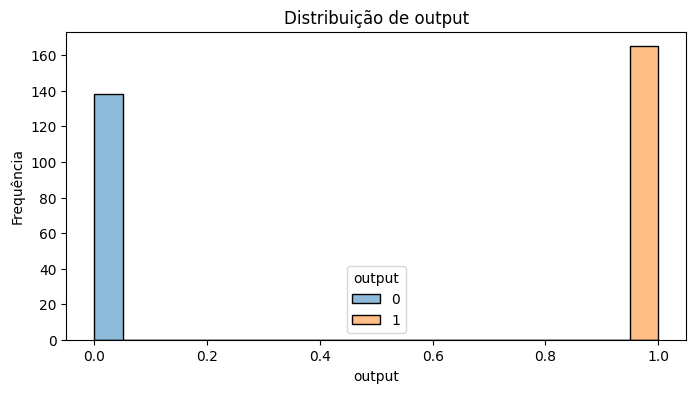

In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas

  # Análise dos dados e verificação de possíveis assimetrias, outliers e padrões

for coluna in dfNumerico:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=dfNumerico, x=coluna, bins=20, kde=True, hue="output")
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()

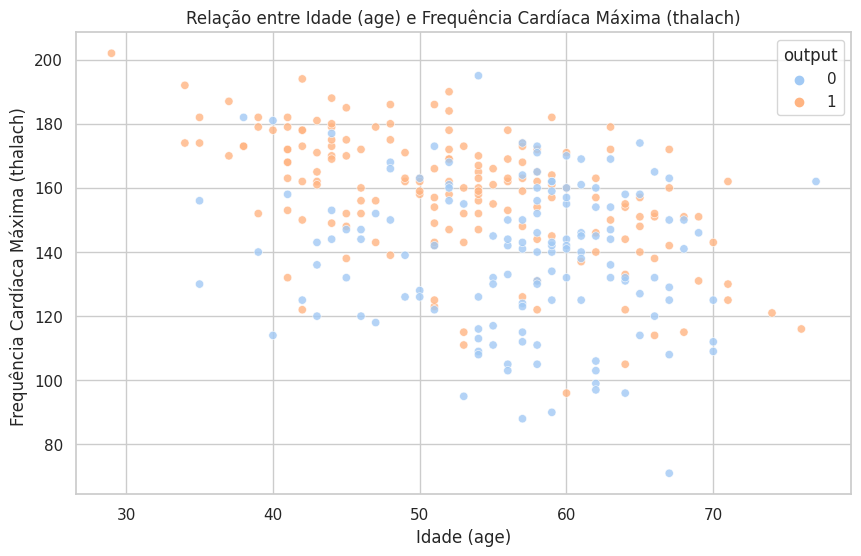

In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas

plt.figure(figsize=(10, 6))
palette = "pastel"
sns.set_palette(palette)
sns.scatterplot(x='age', y='thalachh', hue='output', data=dados, alpha=0.8)


plt.title('Relação entre Idade (age) e Frequência Cardíaca Máxima (thalach)')
plt.xlabel('Idade (age)')
plt.ylabel('Frequência Cardíaca Máxima (thalach) ')


plt.show()




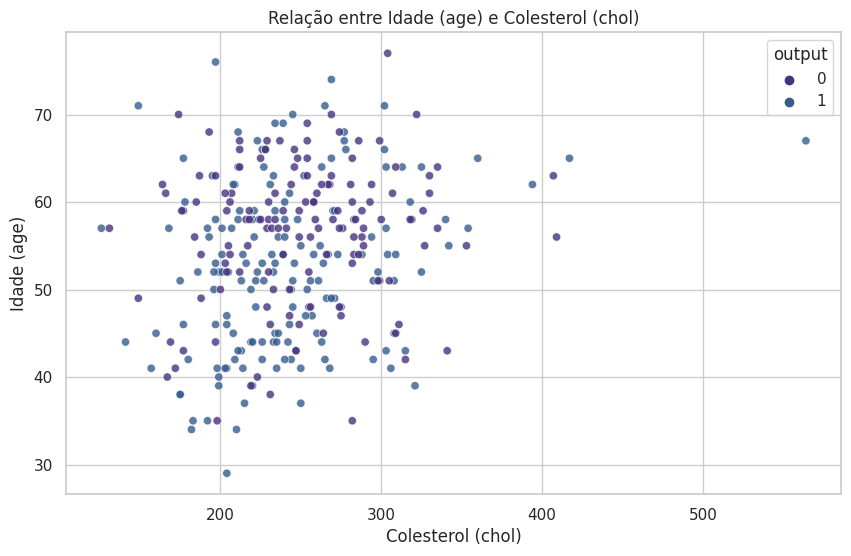

In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='age', data=dfNumerico, alpha=0.8, hue='output')

# Personalize o gráfico
plt.title('Relação entre Idade (age) e Colesterol (chol)')
plt.xlabel('Colesterol (chol)')
plt.ylabel('Idade (age)')

# Exiba o gráfico
plt.show()

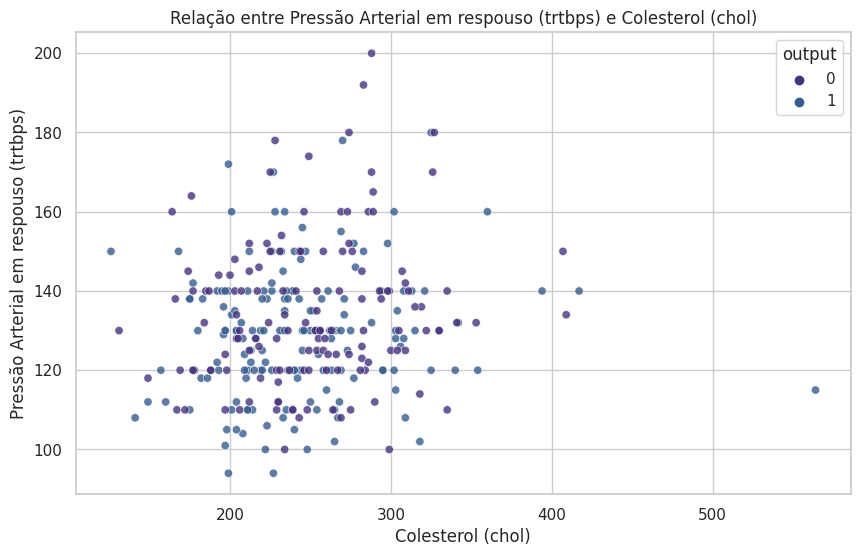

In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='trtbps', data=dfNumerico, alpha=0.8, hue='output')

plt.title('Relação entre Pressão Arterial em respouso (trtbps) e Colesterol (chol)')
plt.xlabel('Colesterol (chol)')
plt.ylabel('Pressão Arterial em respouso (trtbps)')

# Exiba o gráfico
plt.show()

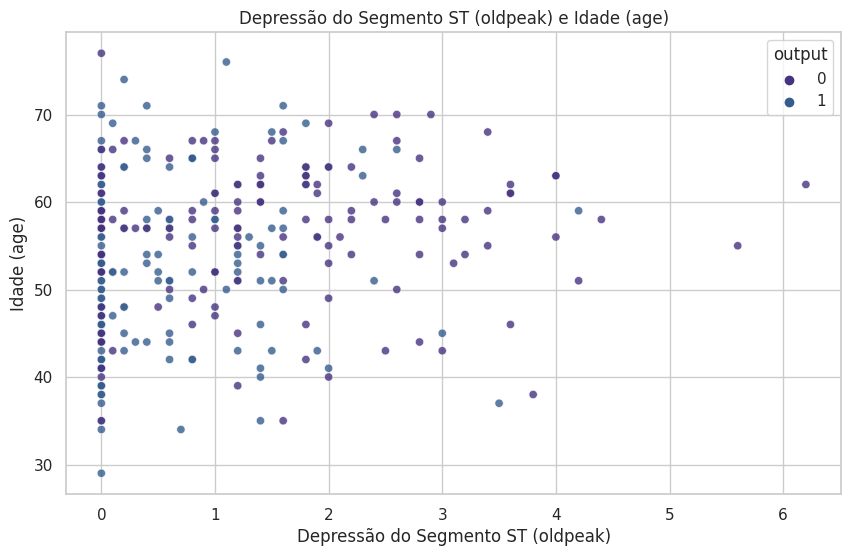

In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldpeak', y='age', data=dfNumerico, alpha=0.8, hue='output')

# Personalize o gráfico
plt.title('Depressão do Segmento ST (oldpeak) e Idade (age)')
plt.xlabel('Depressão do Segmento ST (oldpeak)')
plt.ylabel('Idade (age)')
# Exiba o gráfico
plt.show()

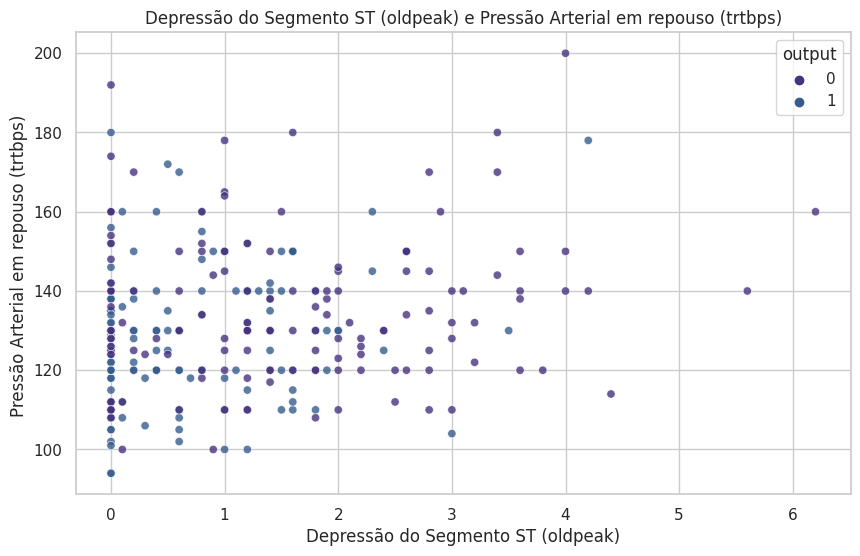

In [ ]:
# Análise de Distribuição de Variáveis - Variáveis Numéricas

plt.figure(figsize=(10, 6))
sns.scatterplot(x='oldpeak', y='trtbps', data=dfNumerico, alpha=0.8, hue='output')

# Personalize o gráfico
plt.title('Depressão do Segmento ST (oldpeak) e Pressão Arterial em repouso (trtbps)')
plt.xlabel('Depressão do Segmento ST (oldpeak)')
plt.ylabel('Pressão Arterial em repouso (trtbps) ')
# Exiba o gráfico
plt.show()

#**ANÁLISE DE CORRELAÇÕES - VARIÁVEIS NUMÉRICAS**

**Explicação da análise dos dados numéricos**


Após análise de correlograma de cada coluna das variáveis numéricas, ficou claro certos pontos:


**Correlações**

Durante nossa análise numérica e gráfica vimos que grande parte das nossas correlações entre as colunas são moderadas ou fracas, significando que há uma relação linear entre as colunas, mas não é tão forte. Antes de explicarmos por cada coluna, é necessário falar que tiveram algumas **correlações** que se **destacaram**, são elas:

  **age e thalachh**: Com uma correlação moderada negativa de -0.398, fazendo com que, a medida que a idade aumenta, a frequência cardíaca tende a diminuir moderadamente.

  **age e chol**: Com uma correlação moderada positiva de 0.213, fazendo com que, a medida que a idade aumentam, os níveis de colesterol também tendem a aumentar moderadamente.

  **age e oldpeak**: Com uma correlação moderada de 0.210, fazendo com que, à medida que a idade aumenta, a depressão do ST induzida pelo exercício tende a aumentar.



**Correlação de age com as outras colunas**

A coluna age tem uma relação entre fraca positiva e moderada negativa com algumas colunas:

  **age e trtbps**: Com uma correlação positiva fraca de 0.279, fazendo com que, à medida que a idade aumenta, a pressão arterial em repouso tende a aumentar um pouco.


**Correlação de trtbps com as outras colunas**

  **trtbps e chol**: Com uma correlação positiva muito fraca de 0.123, fazendo com que, tenham uma relação entre as colunas mas muito fraca;

  **trtbps e thalachh**: Com uma correlação negativa fraca de -0.046698, fazendo com que, há uma relação entre as colunas mas não é muito forte;

  **trtbps e oldpeak**: Com uma correlação positiva fraca de 0,193216, fazendo com que, há uma relação entre as duas colunas mas não é muito forte.


**Correlação de chol com as outras colunas**

  **chol e thalachh**: Com uma correlação negativa fraca de -0.009940, fazendo com que, há uma relação entre as colunas mas não muito forte;

  *chol e oldpeak*: Com uma correlação de positiva fraca de 0.053952, fazendo com que, há uma relação entre as colunas mas não muito forte.


**Correlação de thalachh com as outras colunas**

  **thalachh e oldpeak**: Com uma correlação negativa moderada de -0,344187, fazendo com que, à medida que a frequência cardíaca aumenta, a depressão do segmento ST tende diminuir moderamente.


**Correlação de oldpeak com as outras colunas**

  Não tem correlações fortes com outras variáveis neste conjunto de dados.



Visto toda essa análise, temos alguns pontos importantes:

  *a idade (age)* se mostrou um fator bastante importante, pois as pessoas mais velhas têm uma maior possibilidade de desenvolver doença cardíaca;

  *O colesterol (chol)* também se é um fator importante, pois em níveis elevados podem levar à aterosclerose, uma condição que pode bloquear as artérias e levar a um ataque cardíaco;


  *A frequência cardíaca máxima (thalachh)* é um outro fator importante, pois uma frequência cardíaca alta pode ser um sinal de doença cardíaca;
  
  *A depressão do ST induzida pelo exercício (oldpeak)* é um teste de esforço que pode ser usado para diagnosticar doença cardíaca.



**Desvio Padrão**


  age: A idade mínima é de 29 anos e a idade máxima é de 77 anos. Não há outliers óbvios, mas é importante notar que a idade média é de 55 anos.

  trtbps: A pressão arterial sistólica mínima é de 90 mmHg e a pressão arterial sistólica máxima é de 200 mmHg. Existem alguns valores que parecem ser outliers, como 200 mmHg.

  chol: O colesterol total médio é de 240 mg/dL, o que é considerado alto. Ademais, o colesterol total mínimo é de 120 mg/dL e o colesterol total máximo é de 500 mg/dL.

  thalachh: A frequência cardíaca de repouso mínima é de 40 bpm e a frequência cardíaca de repouso máxima é de 110 bpm. Não há outliers óbvios, mas é importante notar que a frequência cardíaca de repouso média é de 78 bpm.

  oldpeak: O valor mínimo de oldpeak é de 0,1 mm e o valor máximo de oldpeak é de 10 mm. Não há outliers óbvios, mas é importante notar que o valor médio de oldpeak é de 2,2 mm.



**Outliers**

A presença de outliers está em todas as colunas, mas a que mais se destaca é a do *chol* com grandes níveis e diferença de números em relação as outras colunas. Podemos perceber que temos um aumento significativo e bem discrepante na análise dos quartis. Antes de tudo, é importante falar que os valores de dividem em quatro, cada um com 25% dos dados, sabendo disso, vamos mostrar o porquê do *chol* ser a nossa coluna de maior destaque:

 * O primeiro quartil (25%) para o colesterol (chol) é de 211.0.
 * O segundo quartil (50%), que também é a mediana, é de 240.0.
 * O terceiro quartil (75%) é de 274.5.

Com a análise desses três, podemos ver que a maioria dos valores está concetrada dentro dos quartis, realçando uma distribuição relativamente normal.

Já em relação ao quarto quartil (100%) podemos notar uma grande diferença, mostra um valor máximo de 564.0, que é consideravelmente maior do que os valores dos outros quartis. E esse valor discrepante deixa claro a presença de outliers.




#**ANÁLISE DE DISTRIBUIÇÃO DE VARIÁVEIS - VARIÁVEIS CATEGÓRICAS**

In [ ]:
# Verificação de valores nulos - Variáveis Categóricas

dfCategorico.isnull().sum()

sex        0
cp         0
fbs        0
restecg    0
exng       0
slp        0
caa        0
thall      0
output     0
dtype: int64

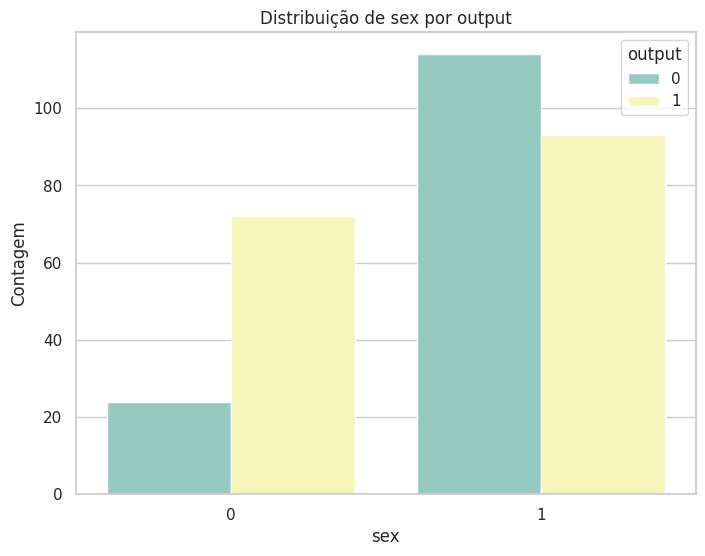

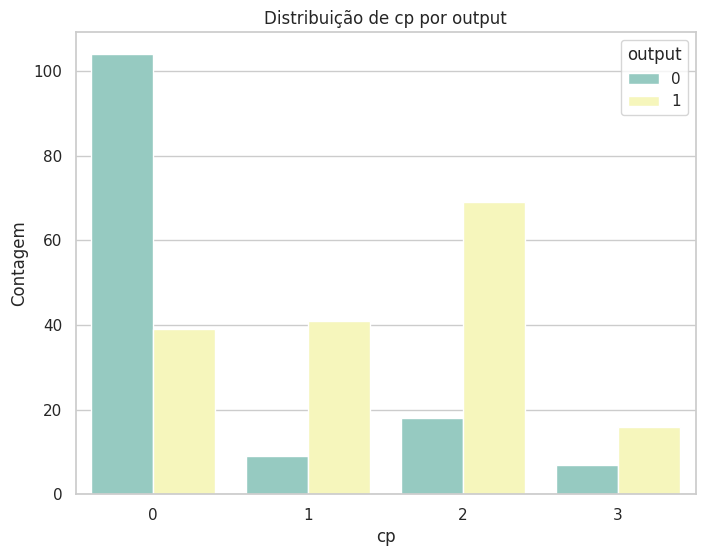

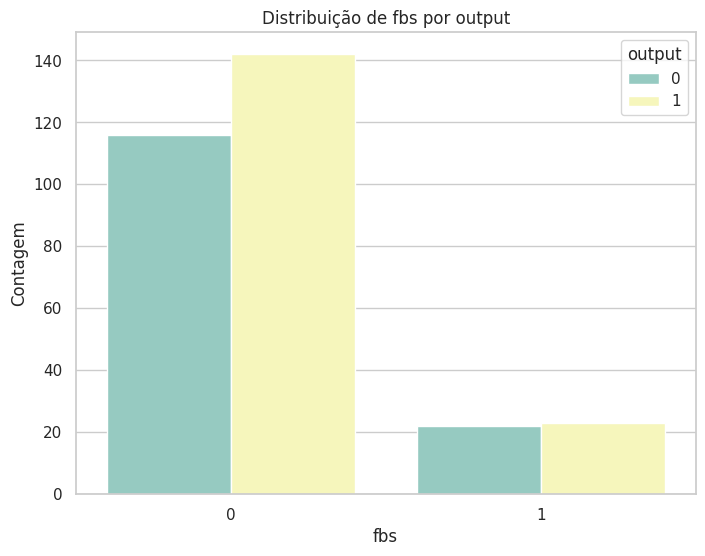

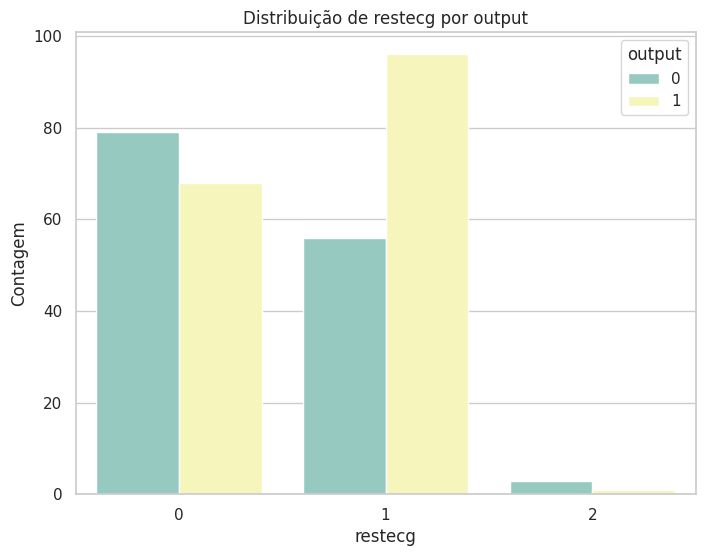

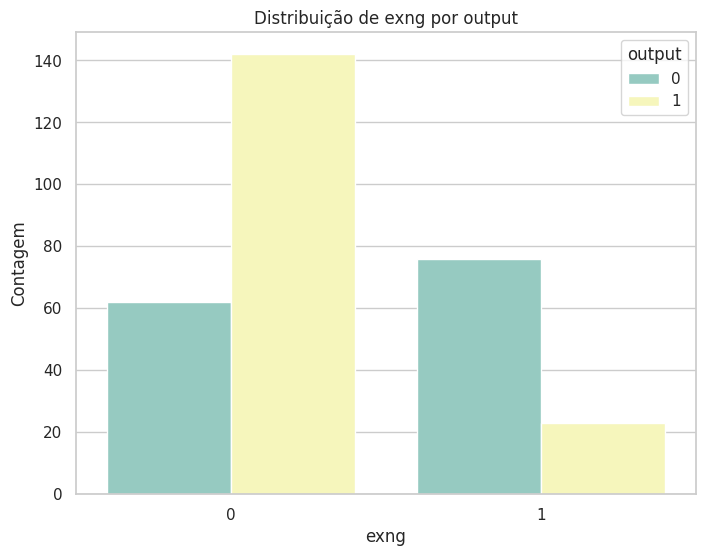

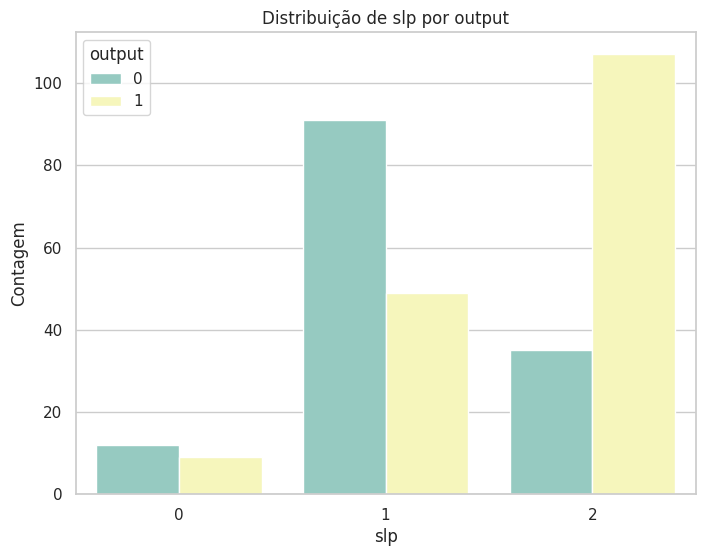

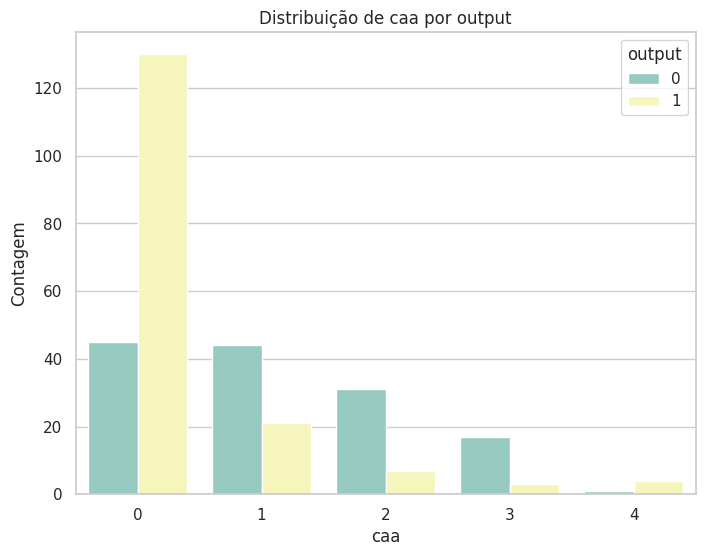

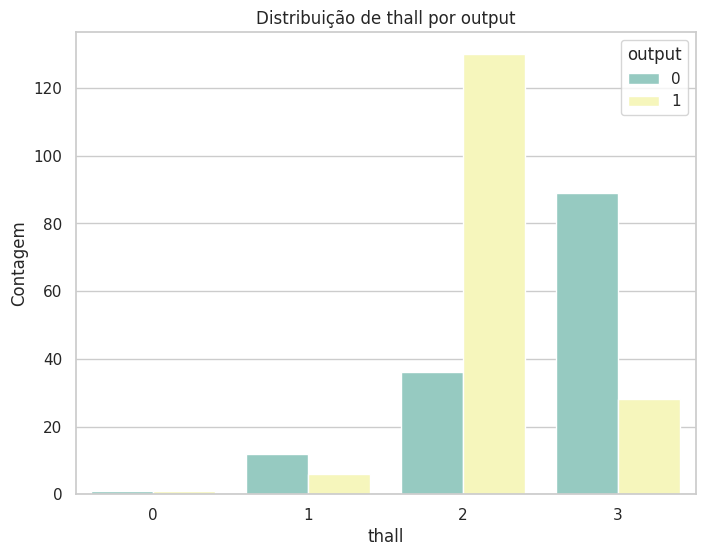

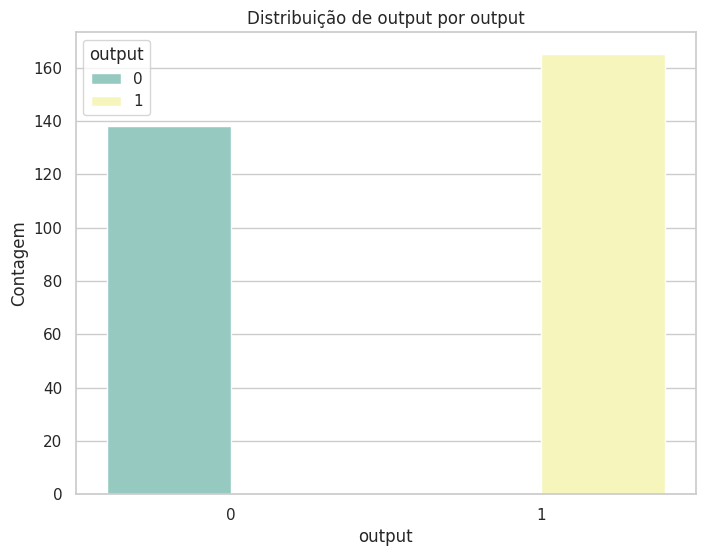

In [ ]:
# Análise dos dados e verificação de possíveis assimetrias, outliers e padrões

palette = "Set3"
  # Função para criar gráficos de barras empilhadas
def stacked_bar_plot(dfCategorico, x_col, hue_col, palette, figsize=(8, 6)):
    plt.figure(figsize=figsize)
    sns.countplot(data=dfCategorico, x=x_col, hue=hue_col, palette=palette)
    plt.title(f'Distribuição de {x_col} por {hue_col}')
    plt.xlabel(x_col)
    plt.ylabel('Contagem')
    plt.legend(title=hue_col)
    plt.show()

# Criando gráficos de barras empilhadas para as variáveis categóricas
for col in dfCategorico:
    stacked_bar_plot(dfCategorico, col, "output", palette)


In [ ]:
# Análise dos dados - Variáveis Categóricas

  # Tabela de contigência

print("Tabela entre Sexo (sex) - Risco de ataque cardíaco (output)\n")
tabela_sex_output = pd.crosstab(dados['sex'], dados['output'])
print(tabela_sex_output)


Tabela entre Sexo (sex) - Risco de ataque cardíaco (output)

output    0   1
sex            
0        24  72
1       114  93


In [ ]:
# Análise dos dados - Variáveis Categóricas
  # Tabela de contigência

print("Tabela entre Dor no peito (cp) - Risco de ataque cardíaco (output)\n")
tabela_cp_output = pd.crosstab(dados['cp'], dados['output'])
print(tabela_cp_output)

Tabela entre Dor no peito (cp) - Risco de ataque cardíaco (output)

output    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


In [ ]:
# Análise dos dados - Variáveis Categóricas
  # Tabela de contigência

print("Jenjum de açucar no sangue (fbs) - Risco de ataque cardíaco (output)\n")
tabela_fbs_output = pd.crosstab(dados['fbs'], dados['output'])
print(tabela_fbs_output)

Jenjum de açucar no sangue (fbs) - Risco de ataque cardíaco (output)

output    0    1
fbs             
0       116  142
1        22   23


In [ ]:
# Análise dos dados - Variáveis Categóricas
  # Tabela de contigência

print("Resultado do eletrocardiograma (rest_ecg) - Risco de ataque cardíaco (output)\n")
tabela_restecg_output = pd.crosstab(dados['restecg'], dados['output'])
print(tabela_restecg_output)

Resultado do eletrocardiograma (rest_ecg) - Risco de ataque cardíaco (output)

output    0   1
restecg        
0        79  68
1        56  96
2         3   1


In [ ]:
# Análise dos dados - Variáveis Categóricas
  # Tabela de contigência

print("Angina induzida por exercício (exng) - Risco de ataque cardíaco (output)\n")
tabela_exng_output = pd.crosstab(dados['exng'], dados['output'])
print(tabela_exng_output)

Angina induzida por exercício (exng) - Risco de ataque cardíaco (output)

output   0    1
exng           
0       62  142
1       76   23


In [ ]:
# Análise dos dados - Variáveis Categóricas
  # Tabela de contigência

print("Inclinação do segmento ST de pico do exercício (slp) - Risco de ataque cardíaco (output)\n")
tabela_slp_output = pd.crosstab(dados['slp'], dados['output'])
print(tabela_slp_output)

Inclinação do segmento ST de pico do exercício (slp) - Risco de ataque cardíaco (output)

output   0    1
slp            
0       12    9
1       91   49
2       35  107


In [ ]:
# Análise dos dados - Variáveis Categóricas
  # Tabela de contigência - caa e output

print("Número de Principais Vasos Coloridos por Fluoroscopia (caa) - Risco de ataque cardíaco (output)\n")
tabela_caa_output = pd.crosstab(dados['caa'], dados['output'])
print(tabela_caa_output)

Número de Principais Vasos Coloridos por Fluoroscopia (caa) - Risco de ataque cardíaco (output)

output   0    1
caa            
0       45  130
1       44   21
2       31    7
3       17    3
4        1    4


In [ ]:
# Análise dos dados - Variáveis Categóricas

  # Tabela de contigência

print("Tipo de Talassemia (thall) - Risco de ataque cardíaco (output)\n")
tabela_thall_output = pd.crosstab(dados['thall'], dados['output'])
print(tabela_thall_output)

Tipo de Talassemia (thall) - Risco de ataque cardíaco (output)

output   0    1
thall          
0        1    1
1       12    6
2       36  130
3       89   28


#**ANÁLISE DE CORRELAÇÕES - VARIÁVEIS CATEGÓRICAS**


**Explicação da Análise dos dados categóricos**


**Sexo (sex) vs. Risco de Ataque Cardíaco (output):**

O sexo foi codificado como 0 (mulher) e 1 (homem);

A tabela de contingência mostra que há 207 homens e 96 mulheres na amostra;

**Sexo 0 (Feminino):** Temos um total de 96 casos do sexo feminino. Desses, 24 não apresentam risco de ataque cardíaco (25%) e 72 têm risco (75%);

**Sexo 1 (Masculino):** Temos um total de 207 casos do sexo masculino. Desses, 114 não apresentam risco de ataque cardíaco (55%) e 93 têm risco (45%).

Ou seja, fica claro que, os homens tendem a ter uma proporção mais alta de risco de ataque cardíaco em comparação com as mulheres na amostra.

**Tipo de Dor no Peito (CP) vs. Risco de Ataque Cardíaco (Output):**

O tipo de dor no peito (CP) foi categorizado em 0, 1, 2 e 3.

**Tipo de Dor no Peito 0 (Angina típica):** Temos um total de 143 casos de dor no peito típica (Angina Típica). Desses, 104 não apresentam risco de ataque cardíaco (73%) e 39 têm risco (27%);

**Tipo de Dor no Peito 1 (Angina atípica):** Temos um total de 50 casos de dor no peito atípica (Angina Atípica). Desses, 9 não apresentam risco de ataque cardíaco (18%) e 41 têm risco (82%);

**Tipo de Dor no Peito 2 (Não anginal):** Temos um total de 87 casos de dor no peito não anginal. Desses, 18 não apresentam risco de ataque cardíaco (21%) e 69 têm risco (79%);

**Tipo de Dor no Peito 3 (Assintomática):** Temos um total de 23 casos de dor no peito assintomática. Desses, 7 não apresentam risco de ataque cardíaco (30%) e 16 têm risco (70%).

Com base na tabela, podemos observar que os tipos de dor no peito 1 (Angina Atípica) e 2 (Não Anginal) têm proporções mais altas de casos com risco de ataque cardíaco em comparação com os tipos de dor no peito 0 (Angina Típica) e 3 (Assintomática). Isso sugere que os tipos de dor no peito 1 e 2 podem estar mais associados a um maior risco de ataque cardíaco nesta amostra específica.


**Açúcar no Sangue em Jejum (FBS) vs. Risco de Ataque Cardíaco (Output):**

O açúcar no sangue em jejum (FBS) foi categorizado como 0 (<= 120 mg/dL) e 1 (120 mg/dL).

A maioria das pessoas na amostra tem um nível de açúcar no sangue em jejum menor ou igual a 120 mg/dL.

A tabela de contingência indica que não há uma clara diferença na proporção de risco de ataque cardíaco entre os dois grupos.

**Resultados do Eletrocardiograma em Repouso (Rest_ECG) vs. Risco de Ataque Cardíaco (Output):**

Os resultados do eletrocardiograma em repouso (Rest_ECG) foram categorizados como 0, 1 e 2.

**Resultado do Eletrocardiograma Normal 0**: Aqui, temos 147 casos totais. Desses, 79 (54%) não apresentam risco de ataque cardíaco e 68 (46%) têm risco;

**Resultado do Eletrocardiograma com Anormalidades na Onda ST-T 1**: Temos um total de 152 casos. Desses, 56 (37%) não apresentam risco de ataque cardíaco e 96 (63%) têm risco;

**Resultado do Eletrocardiograma com Possível Hipertrofia Ventricular Esquerda 2**: Com um total de 4 casos. Desses, 3 não apresentam risco (75%) e 1 têm risco (25%).  


A tabela de contingência sugere que os resultados 0 e 1 têm uma proporção maior de risco de ataque cardíaco em comparação com o resultado 2.

**Angina Induzida por Exercício (exng) vs. Risco de Ataque Cardíaco (output):**

A presença ou ausência de angina induzida por exercício (Exng) foi codificada como 0 (Não) e 1 (Sim).

**Angina Induzida por Exercício 0 (Não):** Temos um total de 204 casos. Dessas, 62 não apresentam risco de ataque cardíaco (30%) e 142 têm risco (70%);

**Angina Induzida por Exercício 1 (Sim):** Temos um total de 99 casos. Dessas, 76 não apresentam risco de ataque cardíaco (77%) e 23 têm risco (23%).

A tabela de contingência mostra que a presença de angina induzida por exercício está associada a um risco mais alto de ataque cardíaco.

**Inclinação do Segmento ST (Slp) vs. Risco de Ataque Cardíaco (output):**

A inclinação do segmento ST (Slp) foi categorizada em 0, 1 e 2.

**Inclinação para baixo (Downsloping):** Temos um total de 21 casos. Dessas, 12 não apresentam risco de ataque cardíaco (57%) e 9 têm risco (43%);

**Inclinação plana (Flat):** Temos um total de 140 casos. Dessas, 91 não apresentam risco de ataque cardíaco (65%) e 49 têm risco (35%);

**Inclinação para cima (Upsloping diagnosis):** Temos um total de 142 casos. Dessas, 35 não apresentam risco de ataque cardíaco (25%) e 107 têm risco (75%).

A tabela de contingência mostra que, em casos com uma inclinação mais elevada (upsloping diagnosis), para cima, há mais riscos de ter ataque cardíaco em comparação com as outras duas.


**Número de Principais Vasos Coloridos por Fluoroscopia (caa) vs. Risco de Ataque Cardíaco (output):**

O número de principais vasos coloridos por fluoroscopia (caa) foi categorizado de 0 a 4.

**0 vasos coloridos:** Temos um total de 175 casos. Dessas, 45 não apresentam risco de ataque cardíaco (26%) e 130 têm risco (74%);

**1 vaso colorido:** Temos um total de 65 casos. Dessas, 44 não apresentam risco de ataque cardíaco (68%) e 21 têm risco (32%);

**2 vasos coloridos:** Temos um total de 38 casos. Dessas, 31 não apresentam risco de ataque cardíaco (82%) e 7 têm risco (18%);

**3 vasos coloridos:** Temos um total de 20 casos. Dessas, 17 não apresentam risco de ataque cardíaco (85%) e 3 têm risco (15%);

**4 vasos coloridos:** Temos um total de 5 casos. Dessas, 1 não apresenta risco de ataque cardíaco (20%) e 4 têm risco (80%).

A tabela de contingência indica que o número de vasos coloridos por fluoroscopia está associado a diferentes proporções de risco de ataque cardíaco. À medida que o número de vasos coloridos aumenta, a proporção de risco de ataque cardíaco também aumenta.

**Tipo de Talassemia (thall) vs. Risco de Ataque Cardíaco (output):**

O tipo de talassemia (thall) foi categorizado em 0, 1, 2 e 3.

A maioria das pessoas na amostra tem tipo 2 (Reversible Defect).

A tabela de contingência sobre a proporção de risco de ataque cardíaco entre os tipos 0, 1, 2 e 3:

**Tipo de Talassemia 0:** Nesta categoria, há 2 casos. Ambos os casos não apresentam risco de ataque cardíaco, o que significa que a proporção de casos sem risco é de 100%.

**Tipo de Talassemia 1:** Há 18 casos nesta categoria. Todos esses 18 casos não apresentam risco de ataque cardíaco, o que também significa uma proporção de 100% de casos sem risco.

**Tipo de Talassemia 2:** Aqui, encontramos um total de 166 casos. Desses, 117 têm risco de ataque cardíaco, enquanto 49 não apresentam risco. A proporção de casos com risco de ataque cardíaco é de aproximadamente 70%, enquanto a proporção de casos sem risco é de cerca de 30%.

**Tipo de Talassemia 3:** Por fim, nesta categoria, há 117 casos. Destes, 28 têm risco de ataque cardíaco, enquanto 89 não apresentam risco. Portanto, a proporção de casos com risco de ataque cardíaco é de cerca de 24%, enquanto a proporção de casos sem risco é de cerca de 76%.

Desse modo, a maioria dos casos com Tipo de Talassemia 2 (Reversible Defect) possui risco de ataque cardíaco. As demais categorias não mostram uma tendência clara de risco.





#**EXPLORAÇÃO DE RELAÇÕES E TENDÊNCIAS**


**VARIÁVEIS NUMÉRICAS - DADOS QUANTITATIVOS**

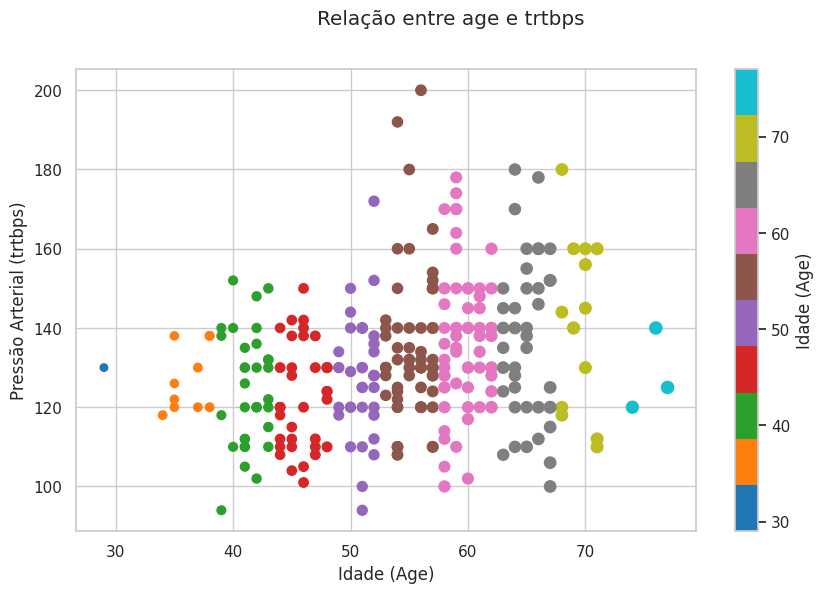

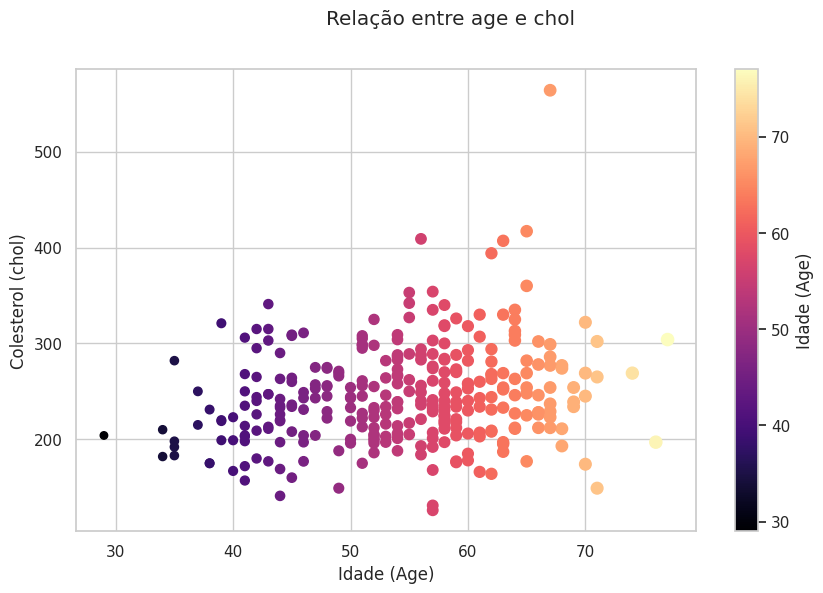

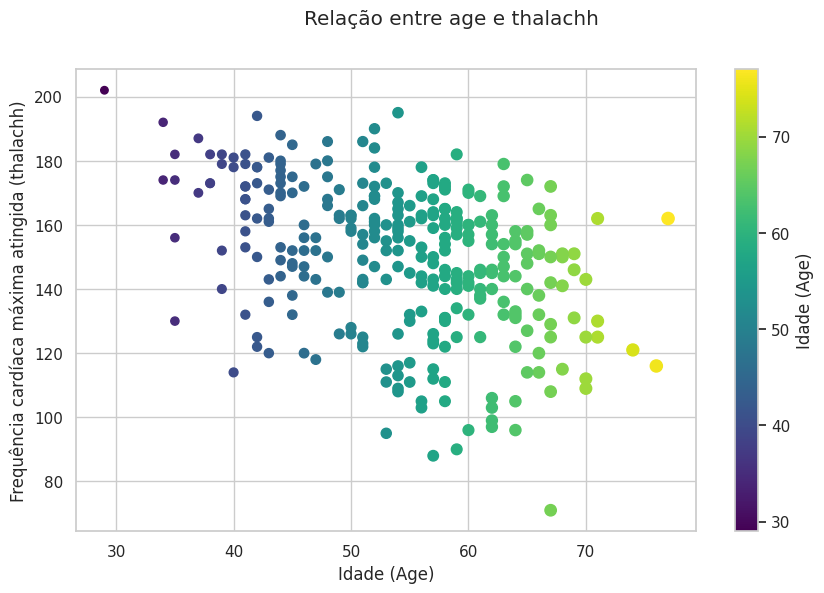

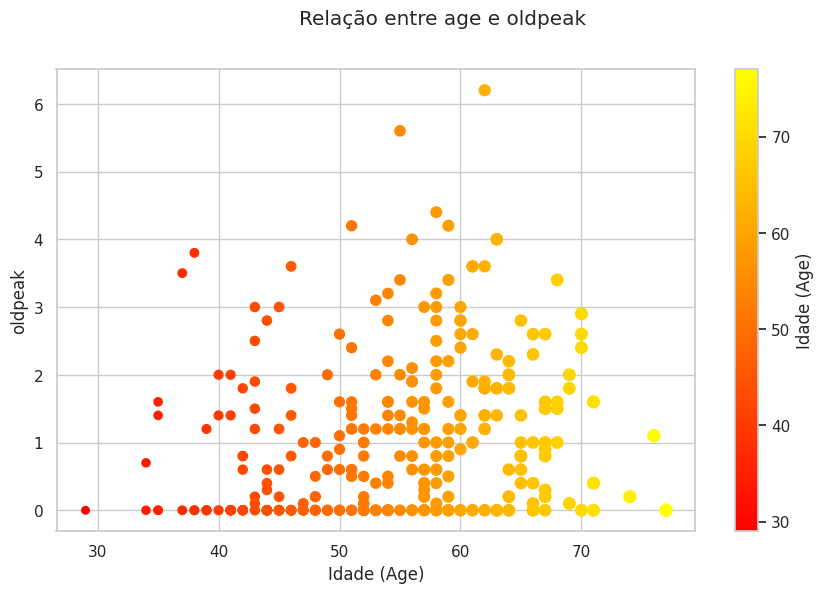

In [ ]:
# Exploração de relações e tendências - Dados quantitativos | Gabi

# Criando um gráfico de dispersão entre "age" e "trtbps" (idade e pressão arterial)
plt.figure(figsize=(10, 6))
plt.scatter(dados['age'], dados['trtbps'], c=dados['age'], s=dados['age'], cmap='tab10')
plt.suptitle('Relação entre age e trtbps' + '\n', x=0.5)
plt.xlabel('Idade (Age)')
plt.ylabel('Pressão Arterial (trtbps)')
plt.colorbar(label='Idade (Age)')

plt.show()
print("\n")

# Relação age e chol (idade e colesterol)
plt.figure(figsize=(10, 6))
plt.scatter(dados['age'], dados['chol'], c=dados['age'], s=dados['age'], cmap='magma')
plt.suptitle('Relação entre age e chol' + '\n', x=0.5)
plt.xlabel('Idade (Age)')
plt.ylabel('Colesterol (chol)')
plt.colorbar(label='Idade (Age)')

plt.show()
print("\n")

# Relação entre age e thalachh (Frequência cardíaca máxima atingida)
plt.figure(figsize=(10, 6))
plt.scatter(dados['age'], dados['thalachh'], c=dados['age'], s=dados['age'], cmap='viridis')
plt.suptitle('Relação entre age e thalachh' + '\n', x=0.5)
plt.xlabel('Idade (Age)')
plt.ylabel('Frequência cardíaca máxima atingida (thalachh)')
plt.colorbar(label='Idade (Age)')

plt.show()
print("\n")

# Relação entre age e oldpeak
plt.figure(figsize=(10.3, 6))
plt.scatter(dados['age'], dados['oldpeak'], c=dados['age'], s=dados['age'], cmap='autumn')
plt.suptitle('Relação entre age e oldpeak' + '\n', x=0.5)
plt.xlabel('Idade (Age)')
plt.ylabel('oldpeak')
plt.colorbar(label='Idade (Age)')

plt.show()

**VARIÁVEIS CATEGÓRICAS - DADOS QUALITATIVOS**

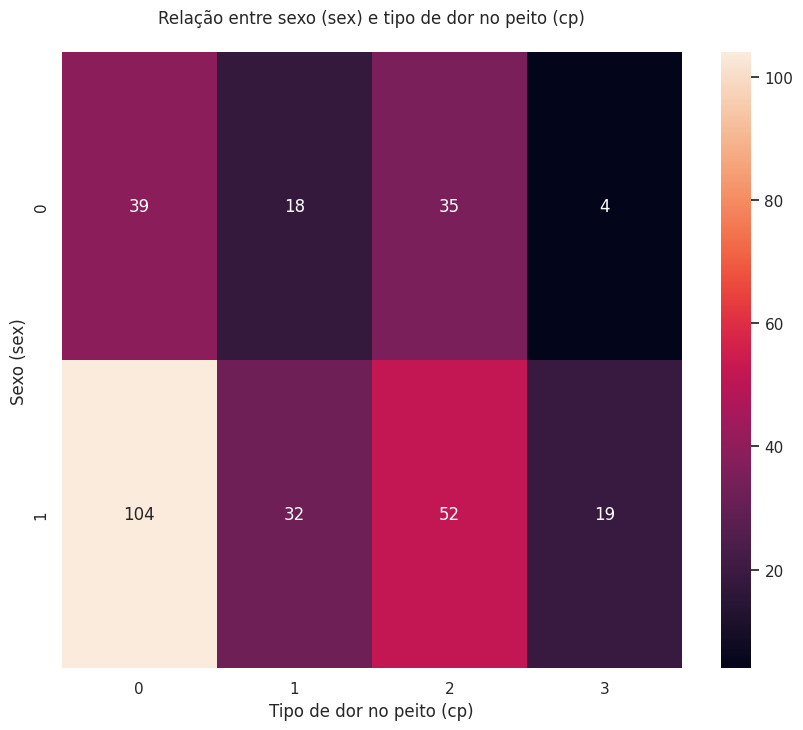

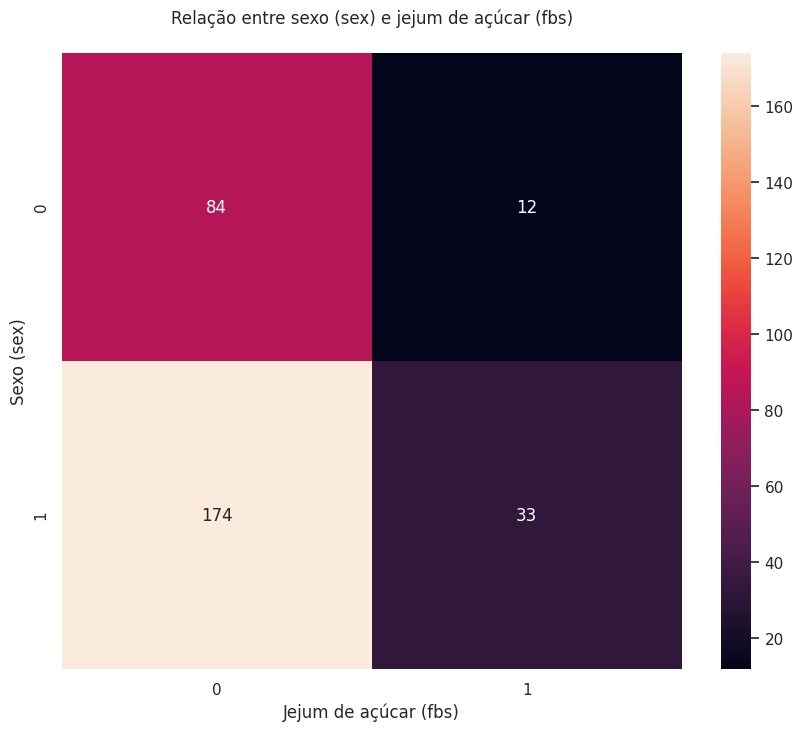

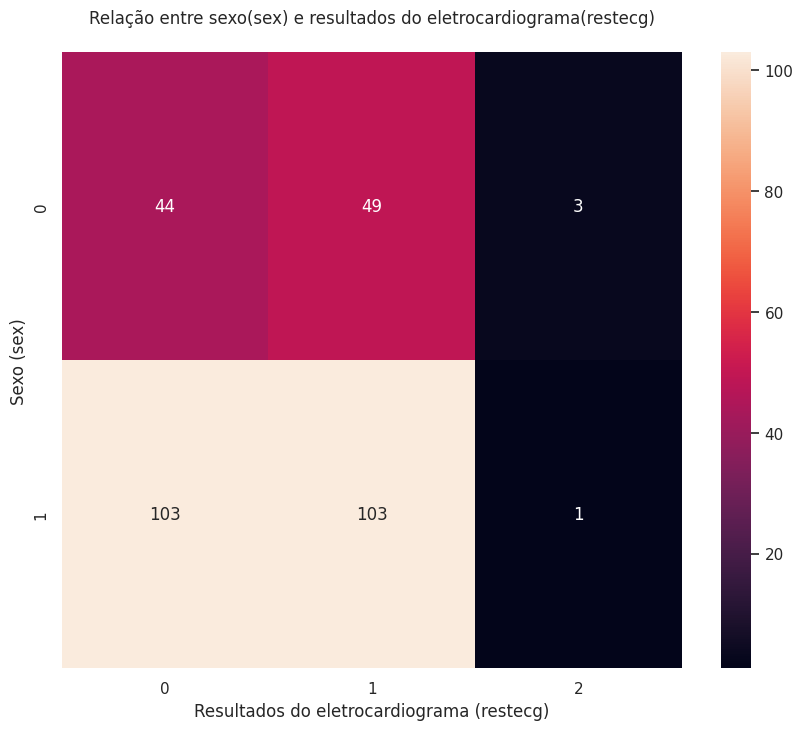

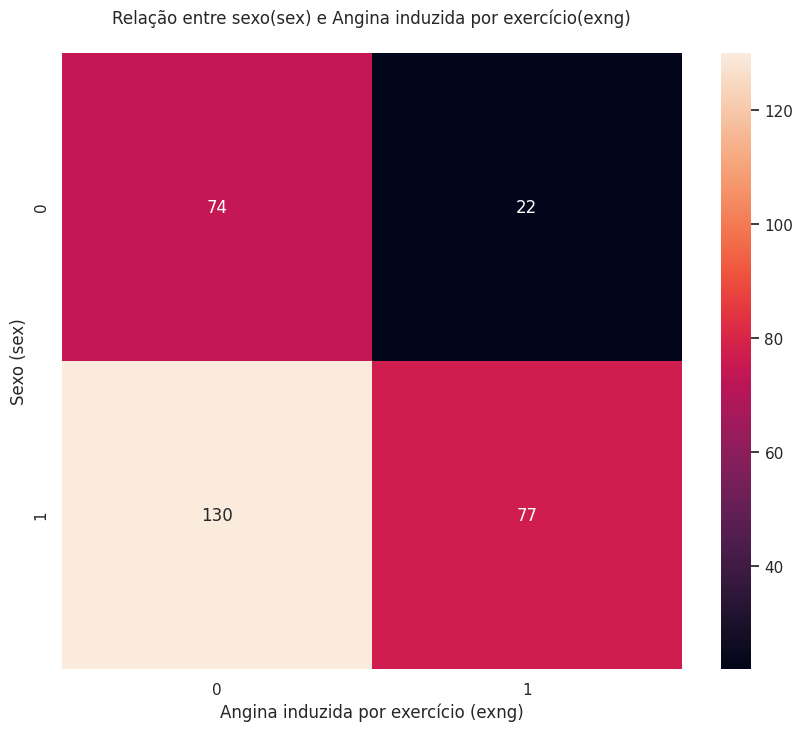

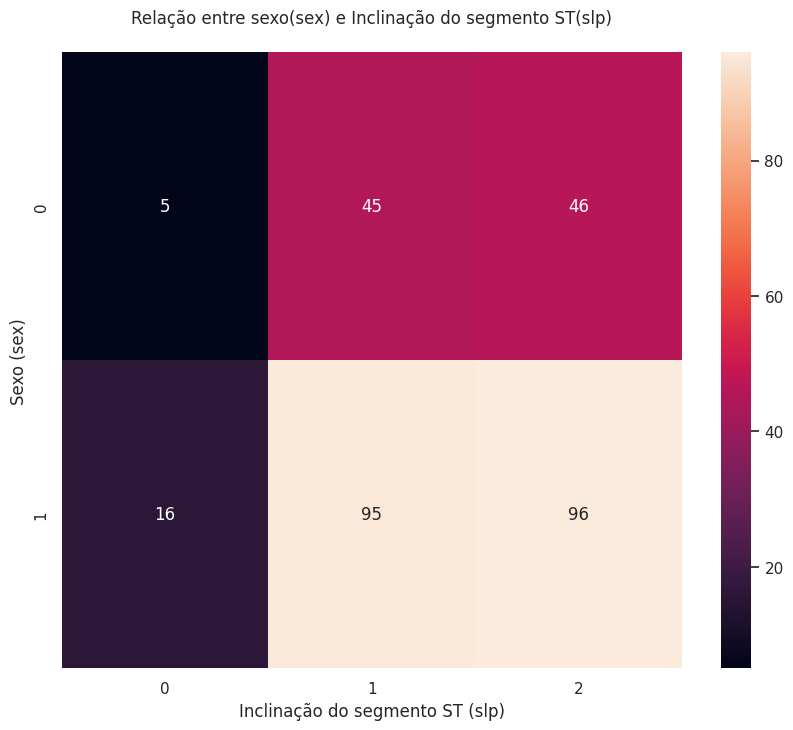

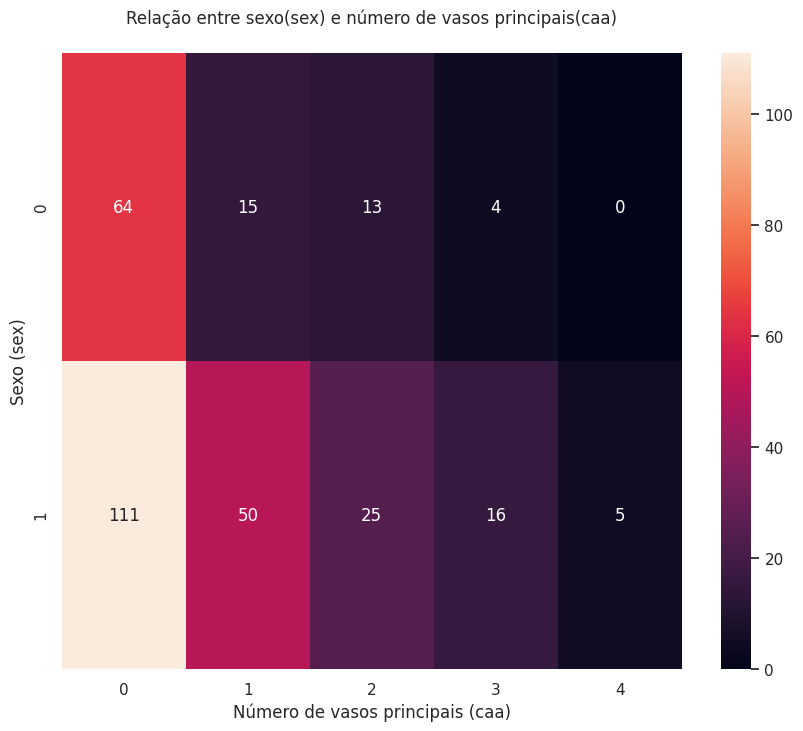

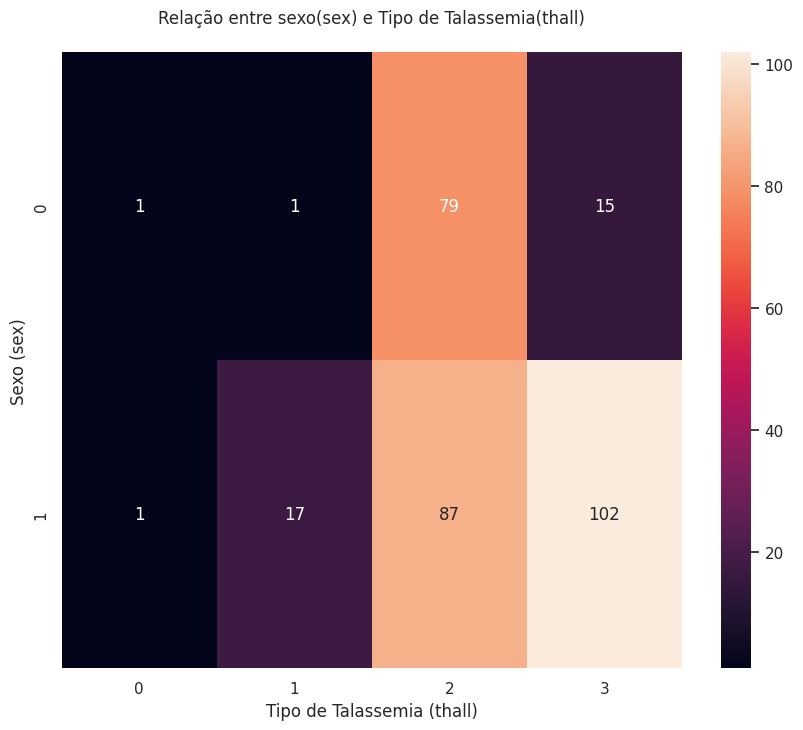

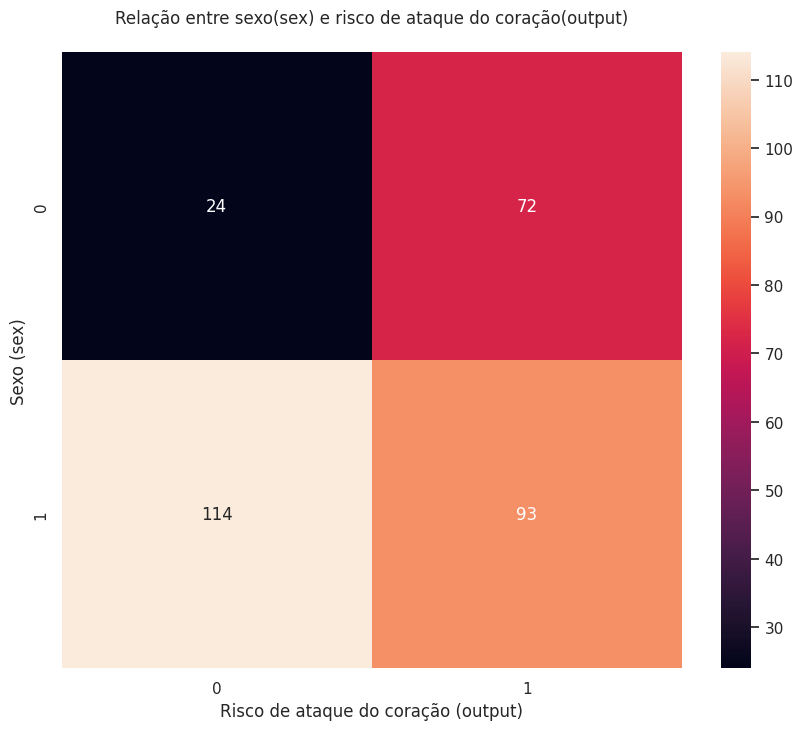

In [ ]:
# Exploração de relações e tendências - Dados qualitativos | Gabi

plt.figure(figsize=(10, 8))

# Relação entre sex e cp
p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['cp']), annot=True, fmt='d')

# Define os rótulos dos eixos
plt.xlabel('Tipo de dor no peito (cp)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo (sex) e tipo de dor no peito (cp)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e fbs
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['fbs']), annot=True, fmt='d')

plt.xlabel('Jejum de açúcar (fbs)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo (sex) e jejum de açúcar (fbs)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e restcg
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['restecg']), annot=True, fmt='d')

plt.xlabel('Resultados do eletrocardiograma (restecg)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo(sex) e resultados do eletrocardiograma(restecg)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e exng
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['exng']), annot=True, fmt='d')

plt.xlabel('Angina induzida por exercício (exng)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo(sex) e Angina induzida por exercício(exng)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e slp
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['slp']), annot=True, fmt='d')

plt.xlabel('Inclinação do segmento ST (slp)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo(sex) e Inclinação do segmento ST(slp)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e caa
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['caa']), annot=True, fmt='d')

plt.xlabel('Número de vasos principais (caa)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo(sex) e número de vasos principais(caa)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e thall
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['thall']), annot=True, fmt='d')

plt.xlabel('Tipo de Talassemia (thall)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo(sex) e Tipo de Talassemia(thall)' + '\n', x=0.5)
plt.show()
print("\n")

# Relação entre sex e output
plt.figure(figsize=(10, 8))

p1 = sns.heatmap(pd.crosstab(dataSetCategorico['sex'], dataSetCategorico['output']), annot=True, fmt='d')

plt.xlabel('Risco de ataque do coração (output)')
plt.ylabel('Sexo (sex)')
plt.title('Relação entre sexo(sex) e risco de ataque do coração(output)' + '\n', x=0.5)
plt.show()
print("\n")

#**ANALISE DE OUTLIERS**




**age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall, output.**


#**Sobre a retirada de colunas:**

Dada a importância indivídual de cada coluna para o resultado final o "output", o grupo Optou por não retirar nenhuma coluna.
    # Todas as colunas foram analizadas e cada uma delas tem grande importância. Principalmente na identificação de algum problema cardíaco.
    # De acordo com as colunas disponíveis temos acesso direto a informação de dados da pressão arterial; Colesterol no sangue;
    # o sexo do indivíduo; a idade; níveis de dor e intensidade de dores no peito; Quantidade de açucar no sangue; Dados de
    # eletrocardiograma; Angina/Perturbações ou problemas ao fazer exercícios; Elevação no seguimento 'st' ou seja, elevações
    # bruscas nos dados de batimentos cardíacos em cardiogramas; número de vasos sanguíneos visíveis em uma fluoroscopia;
    # o teste de talassemia trazendo muitas informações importantes consigo; e o output (saida) com o resultado de uma alta taxa
    # de chance de ataque cardíaco.


AGE: Trazendo informações sobre a idade das pessoas.

SEX: Trazendo informações sobre o sexo das pessoas avaliadas em cada linha.

CP: Trazendo informações dos tipos de dores no peito.

TRTBPS: Trazendo informações sobre a Pressão Arterial de uma pessoa em respouso

CHOL: Trazendo informações sobre o nível de colesterol no sangue

FBS: Trazendo informações da quantidade de açucar no sangue.

RESTECG:Trazendo informações sobre os dados de um eletrocardiograma.

THALACHH: Trazendo informações sobre a frequência cardíaca.

EXNG: Trazendo informações sobre a Angina/perturbação corporal induzida por exercícios

OLDPEAK: Trazendo Informações sobre Depressão do Segmento ST

SLP: Trazendo informações sobre picos de batimentos cardíacos em um eletrocardiograma

CAA: Trazendo informações sobre Número de Principais Vasos Coloridos por Fluoroscopia.

THALL: Trazendo informações sobre o prognóstico de Talassemia

OUTPUT: Trazendo informações de saída, informando se a pessoa tem ou não risco de ataque cardíaco.




In [ ]:
#RETIRADA E MANUTENÇÂO DE OUTLIERS.

#Utilizando Quartis para identificar outliers em variáveis numéricas e remove-los:
IQR = Q3 - Q1
lwr_bound = Q1-(1.5*IQR)
upr_bound = Q3+(1.5*IQR)
print("------------------------------\n")
print(IQR)
print("\n------------------------------\n")
print(lwr_bound)
print("\n------------------------------\n")
print(upr_bound)

#aqui conseguimos identificar um intervalo entre os valores numéricos, basicamente uma "média".

------------------------------

age         13.5
trtbps      20.0
chol        63.5
thalachh    32.5
oldpeak      1.6
dtype: float64

------------------------------

age          27.25
trtbps       90.00
chol        115.75
thalachh     84.75
oldpeak      -2.40
dtype: float64

------------------------------

age          81.25
trtbps      170.00
chol        369.75
thalachh    214.75
oldpeak       4.00
dtype: float64


In [ ]:
# Ordenando por idade.
print(dfNumerico.sort_values(["age", "trtbps","chol"]))

# Identificamos que quanto maior a idade, maior é a variação entre o trtbps, Elas sempre tendem a ser ou muito altas ou muito baixas

# Já no caso do colesterol, quanto maior a idade maior é a chance de ter uma alta concentração de colesterol no sangue.

# Se as taxas de chol, trtbps, thalachh estiverem fora do intervalo, o output tenderá a dar 1 (chance alta de ataque cardíaco).

     age  trtbps  chol  thalachh  oldpeak  output
72    29     130   204       202      0.0       1
58    34     118   182       174      0.0       1
125   34     118   210       192      0.7       1
227   35     120   198       130      1.6       0
157   35     122   192       174      0.0       1
..   ...     ...   ...       ...      ...     ...
151   71     112   149       125      1.6       1
25    71     160   302       162      0.4       1
129   74     120   269       121      0.2       1
144   76     140   197       116      1.1       1
238   77     125   304       162      0.0       0

[303 rows x 6 columns]



#**Sobre a retirada e linhas e manutenção dos dados Outliers:**

Dada a importância indivídual de cada linha para o resultado final do "output", o grupo optou por não retirar nenhuma Linha ou modificar dados fora do intervalo.

Os dados que ultrapassam o intervalo não causam grande diferença no resultado final dessa média e como a quantidade de linhas da tabela é relativamente pequena, os dados outliers não ultrapassam em grande escala seja pra cima do intervalo(valores mais altos) ou pra baixo do mesmo.

Levando em consideração essas variações, elas nos dão uma margem extra para a análise desses dados, onde em alguns casos, esses dados fora do intervalo indivíalmente não diferenciam o resuldado final do (output), porém se três dados em conjunto de uma pessoa excedem esse limite, então a chance de um ataque cardíaco é aumentado drasticamente.

#**COMUNICAÇÃO DE RESULTADOS**

## **Considerando a análise das variáveis numéricas e categóricas evidenciadas pelos gráficos e pela verificação dos dados, pudemos chegar às seguintes conclusões:**


<br>

1.   **Idade (numérica) e Sexo (categórica):** A partir dos dados analisados observamos que os homens têm uma proporção mais alta de risco de ataque cardíaco em comparação com as mulheres. Além disso, outro fator foi identificado como predominante no risco de ataque cardíaco: a idade. Durante a análise, ficou evidente que o avanço da idade está associado a um aumento significativo da probabilidade de ocorrência de outros problemas de saúde identificados na correlação, como níveis de colesterol e pressão arterial.

2.   **Idade (numérica) e Níveis de colesterol (numérica):** Durante a análise, constatou-se uma relação significativa entre o avanço da idade e os níveis de colesterol. Essa associação sugere que à medida que a idade aumenta, os níveis de colesterol também tendem a aumentar, o que pode resultar em um maior risco de desenvolvimento de condições relacionadas ao coração.
3.   **Níveis de colesterol (numérica) e Tipo de dor no peito (categórico):** Foi identificado que os tipos de dores no peito atípicas e não anginais estão correlacionadas com os níveis mais elevados de colesterol, indicando um risco mais significativo de ataque cardíaco. A extração dessa informação enfatiza a importância de avaliar os níveis de colesterol em conjunto com o tipo de dor no peito para uma compreensão mais abrangente do risco cardiovascular.

4.   **Frequência cardíaca máxima durante exercício (numérica) e Resultados do Eletrocardiograma (categórico):** Observamos uma associação entre a presença de anormalidades no eletrocardiograma e afrequência cardíaca mais elevada, indicando um risco mais elevado de ataque cardíaco.


5.  **Pressão arterial em repouso (numérica) e Angina induzida por exercício (categórico):** A análise revelou uma ligação entre a angina induzida por exercício e níveis elevados de pressão arterial em repouso. Isso implica um aumento do risco de ataque cardíaco, uma vez que a angina é frequentemente um sintoma de doença cardíaca coronária, que pode ser desencadeada pelo esforço físico. A presença de pressão arterial elevada em repouso sugere uma carga adicional sobre o sistema cardiovascular, aumentando ainda mais o risco de um ataque cardíaco.
6.   **Depressão do ST induzida por exercício (numérica) e Inclinação do segmento ST (categórica):** Durante a análise foi observada uma relação entre a inclinação do segmento ST e a depressão do ST induzida pelo exercício. Essa associação sugere que alterações na inclinação do segmento ST podem estar correlacionadas com a presença de depressão do ST induzida pelo exercício, o que pode indicar uma função cardíaca comprometida.

7.  **Idade (numérica) e Frequência cardíaca máxima durante exercício (numérica):** Após a análise dos dados foi possível perceber a elevação crescente da frequência cardíaca máxima durante exercícios paralela à idade. Os níveis de frequência cardíaca por si só não são suficientes para um diagnóstico. Entretanto, níveis persistentemente elevados de frequência cardíaca em repouso ou durante o exercício podem indicar a presença de certas condições cardíacas ou problemas de saúde subjacentes que podem requerer uma avaliação médica mais aprofundada.








# **IDENTIFICAÇÃO DE POTENCIAS PROBLEMAS E LIMITAÇÕES**

#**Limitações**

**Tamanho da base de dados:** A nossa amostra tem um tamanho pequeno de 303 linhas e 14 colunas, podendo restringir a capacidade de gerar conclusões para a toda a população em geral.

**Víes de Amostragem:** Por ser uma base de dados pequena, trabalhamos com dados bem específicos na qual não poderá atender à uma toda população, por exemplo, possuímos uma determinação de idade específicas, com a idade mínima obtendo 29 anos e máxima de 77 anos e também tendo todo esse espaço das idades entre as duas. Desse modo, concluímos que contamos com um público específico a qual a nossa IA conseguirá trabalhar e analisar os dados.

#**Potencias problemas**


**Valores das variáveis categóricas:** Como foi visto durante toda a nossa análise, a presença das variáveis categóricas são maiores que as numéricas. Tendo isso em vista, podemos perceber que, por mais que elas sejam categóricas, não tem a explicação da classificação dos tipos das variáveis pois a categorização é representada de forma numéricas. Por exemplo a coluna dor no peito(cp), temos quatro tipos de dores que são representados por: 0, 1, 2, 3. Desse modo, o tratamento incorreto dessas variáveis categóricas poderá ser um potencial problema para a análise final da IA.

**Limitação das variáveis:** Esse é um ponto importante e bastante específico e profundo da nossa análise, tendo toda as atenções a coluna de dor no peito(cp). Como foi dito anteriormente, essa coluna é uma variável categórica que apresenta a representação de quatro tipos de dores no peito, são elas: 0 - Angina típica, 1 -Angina atípica, 2 - Não-anginal  e 3 - Assintomática.

Olhando de uma forma mais crítica, essa categorizção das dores do no peito(cp) pode ser um problema e limitação pelo simples fato de que pode simplificar em excesso a complexidade da dor no peito. Diante disso, existem diferentes graus de angina, desde leve até grave, e outros tipos de dor no peito que podem ser causados por condições médicas diversas.

Em sequência disso, essa categorização do dor no peito (cp) poderá ser uma limitação no impacto dos resultados se essa variável tiver um papel significativo na análise dos resultados.

Desse modo, tudo vai depender do foco das variáveis como fatores de risco de ataques cardíacos, possa ser que outras colunas tenham mais destaque quanto a isso e a limitação da variável dor no peito(cp) não seja tão viável nesse sentido.

Por fim, foi discutido isso em grupo e decidimos mostrar essa potencial limitação e problema para deixar claro que é importante considerar o valor das variáveis e principalmente a dor no peito (cp) no contexto da nossa análise geral.



